# WARNING
fenotag gpio=1st

# START

In [ ]:
import pandas as pd
import numpy as np
import os
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
import re
import ast
from itertools import product
from scipy.spatial.distance import cdist # Added for cdist

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score # Added accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.utils import to_categorical
# from sklearn.metrics import classification_report, accuracy_score

# from keras.models import Sequential, Model
# from keras.layers import Dense, Dropout, Input, Conv1D, MaxPooling1D, Flatten
# from keras.utils import to_categorical, set_random_seed

# from keras.optimizers import Adam
# from keras.callbacks import ModelCheckpoint, EarlyStopping

#
import tensorflow as tf
from keras.utils import set_random_seed, to_categorical
from keras.models import Sequential, Model
from keras.layers import (Dense, Dropout, Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D,
                          Flatten, Reshape, LSTM, SpatialDropout2D, BatchNormalization, concatenate)
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from keras.constraints import max_norm
#

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import json
from json import loads, dumps

from scipy.signal import find_peaks

def get_nearest_antenna(points, antennas):
    # Returns index of nearest antenna for each point
    dists = cdist(points, antennas)
    return np.argmin(dists, axis=1)


In [ ]:


import sklearn
sklearn.__version__

'1.6.1'

file.split('__')[-1].rstrip('.csv')

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
os.getcwd()

'/content'

In [ ]:
os.listdir()

['notebook', 'raw_data', 'RTLS AI_29Dec2025 v2.pptx']

In [ ]:
os.listdir('drive')

['.shortcut-targets-by-id', 'MyDrive', '.Trash-0', '.Encrypted']

In [ ]:
os.listdir('drive/MyDrive')

['dock door WIP',
 'Bonjour 2.0.4',
 'dock door RT student project',
 'articles_RFID_AI',
 'dock door RT student project - WIP',
 'ping 2024 vicom',
 'ismin workshop 2024',
 'students 2024 big data',
 'ismin 2A 2024',
 'Contrat Christophe LOUSSERT.pdf',
 'SF',
 'SF Terrence',
 'PX 2024-25',
 'Outlook',
 'lcis 3f0 May2023',
 'pwd - sec.xlsx',
 'backup',
 'SCS',
 'esiee_dsai_2024_25',
 'FlexouGame',
 'EdgeAI 2025',
 'esiee dsai 2025',
 'ismin workshop 3A 2025',
 'Acceliot JEI',
 'ismin 2A 2025',
 'AIx universal',
 'wrapper DLA',
 'AEP',
 'Zebra',
 'syncotek',
 'esigelec 2025-26',
 'x=0__y=0__z=0.5.txt',
 'x=1__y=0__z=0.5.txt',
 'x=2__y=0__z=0.5.txt',
 'x=0__y=-1__z=0.5.txt',
 'x=2__y=-1__z=0.5.txt',
 'x=0__y=-2__z=0.5.txt',
 'x=1__y=-2__z=0.5.txt',
 'x=2__y=-2__z=0.5.txt',
 'x=0__y=1__z=0.5.txt',
 'x=1__y=1__z=0.5.txt',
 'x=2__y=1__z=0.5.txt',
 'x=2__y=2__z=0.txt',
 'x=1__y=2__z=0.5.txt',
 'x=0__y=2__z=0.5.txt',
 'x=-2__y=2__z=0.txt',
 'x=-2__y=1__z=0.5.txt',
 'x=-2__y=-2__z=1.5.txt',
 '

In [ ]:
%cd 'drive/MyDrive/RTLS HQ'

/content/drive/MyDrive/RTLS HQ


In [ ]:
os.listdir()

['notebook', 'raw_data']

# RFID data

pathfiles

# PX2025 & HQ

In [ ]:


Pathfiles_dict = {\

      # ESISAR PX small room, square2m
      # 'ConfID=2025-10-21 14h00__Item=foam__Qtags=10__Carrier=sapiens__Speed=static__Site=esisar__antConf=floor__ antSep=2m__antTilt=0':\
      # {'Reader=SF__Session=S0__Power=30dBm__Q=4':\
      #      [ 'id=2025-10-21 16h00'],\
      # },\

      # ESISAR PX small room, colocated antennas in NSEW
      'ConfID=2025-11-18__Item=foam__Qtags=10__Carrier=sapiens__Speed=static__Site=esisar__antConf=floor__ antSep=0m__antTilt=45':\
      {'Reader=SF__Session=S0__Power=30dBm__Q=4':\
           [ 'id=2025-11-18 14h00'],\
       },\

      # ESISAR PX anechoic chamber, colocated antennas in NSEW
      # 'ConfID=2025-12-02__Item=foam__Qtags=10__Carrier=sapiens__Speed=static__Site=anechoic_esisar__antConf=floor__ antSep=0m__antTilt=45':\
      # {'Reader=SF__Session=S0__Power=30dBm__Q=6':\
      #      [ 'id=2025-12-02 14h00'],\
      # },\

      # HQ
      # 'ConfID=2025-12-10__Item=cardboard__Qtags=20__antQ=8__Site=AcceliotIncHQ':\
      # {'Reader=SF__Session=S?__Power=30dBm__Q=?':\
      #      [ 'id=2025-12-10'],\
      # },\

                 }

# raw data

In [ ]:
RoundStart = pd.DataFrame()
gpio = pd.DataFrame()
Runs = []
tags = pd.DataFrame()
Actuals = pd.DataFrame()

for Conf in Pathfiles_dict.keys():
  print(Conf)
  for Reader in Pathfiles_dict[Conf].keys():
    print(Reader)
    settings_Conf_Reader = Conf + '__' + Reader
    # print(settings_Conf_Reader)
    for runID in Pathfiles_dict[Conf][Reader]:
      print(runID)
      settings_Conf_Reader_runID = settings_Conf_Reader + '__' + runID

      pathfile = os.path.join ('raw_data', Conf, Reader, runID)
      # print(os.listdir(pathfile))
      for file in os.listdir(pathfile):
        print(file)
        if file.endswith('txt'):
      # print(file)
          settings = settings_Conf_Reader_runID + '__' + file.rstrip('.txt')
          print(settings)
          settings = [x.split('=') for x in settings.split('__') ]
          print(settings)
          settings = {key:value for key, value in settings}
      # print(settings)
          filename = os.path.join(pathfile, file)
          errors_json=0
          counter_lines=0
          with open(filename, 'rt') as lines:
            run=0
            tags_run=[]
            RoundStart_run=[]
            gpio_run=[]

            for line in lines:
              if line.startswith('data: '):
                data_str = line.split('data: ')[1]
                try:
                  data_json = json.loads(data_str)
                  if run==0:
                    run=data_json['datestamp']
                    run=pd.to_datetime(run, format='%y/%m/%d %H:%M:%S.%f').round('1s')
                    print(run)
                    settings['run']=run

                  if data_json['type']=='RoundStart':
                    RoundStart_run.append(data_json)
                  if data_json['type']=='TagReadData':
                    tags_run.append(data_json)
                  if data_json['type']=='SensorData':
                    gpio_run.append(data_json)
                except:
                  errors_json += 1
        # print(tags_run)
            tags_run = pd.DataFrame(tags_run)
            tags_run['run'] = run
        # ConfID = settings['ConfID']
        # tags_run['ConfID'] = ConfID
    #
        # for key, value in settings.items():
        #   tags_run[key] = value

            Runs.append(settings)

            tags = pd.concat([tags, tags_run])
            RoundStart_run = pd.DataFrame(RoundStart_run)
            RoundStart_run['run'] = run
        # RoundStart_run['ConfID'] = ConfID
            RoundStart = pd.concat([RoundStart, RoundStart_run])
            gpio_run = pd.DataFrame(gpio_run)
            gpio_run['run'] = run
        # gpio_run['ConfID'] = ConfID
            gpio = pd.concat([gpio, gpio_run])

      print(errors_json)
  #
  # Actuals
  #
  pathfile_Actuals = os.path.join ('raw_data', Conf, 'Actuals')
  print(pathfile_Actuals)

  for file in os.listdir(pathfile_Actuals):
    print(file)
    filename = os.path.join(pathfile_Actuals, file)
    settings_temp = {x.split('=')[0] : x.split('=')[1]  for x in file.rstrip('.csv').split('__')}
    # Actuals with labelled columns (EPC, x, y, z) or without label (EPC list only )
    Bool_Actuals = 'EPC' in pd.read_csv(filename, nrows=0, sep=';').columns
    if Bool_Actuals:
      Actuals_temp = pd.read_csv(filename, sep=';', dtype=str, decimal=',')
    else:
      Actuals_temp = pd.read_csv(filename, names=['EPC'], dtype=str)

    for key, value in settings_temp.items():
      Actuals_temp[key] = value
    ConfID=settings['ConfID']
    Actuals_temp['ConfID']=ConfID
    Actuals = pd.concat([Actuals, Actuals_temp])
  print(Actuals.shape)
  #
  # antConf
  #
  pathfile_antConf = os.path.join ('raw_data', Conf, 'antConf')
  file = os.listdir(pathfile_antConf)[0]
  filename = os.path.join(pathfile_antConf, file)
  print(filename)
  antConf = pd.read_csv(filename, sep=';', decimal=',')
  print(antConf.shape)

ConfID=2025-11-18__Item=foam__Qtags=10__Carrier=sapiens__Speed=static__Site=esisar__antConf=floor__ antSep=0m__antTilt=45
Reader=SF__Session=S0__Power=30dBm__Q=4
id=2025-11-18 14h00
x=-1__y=-1__z=2.5.txt
ConfID=2025-11-18__Item=foam__Qtags=10__Carrier=sapiens__Speed=static__Site=esisar__antConf=floor__ antSep=0m__antTilt=45__Reader=SF__Session=S0__Power=30dBm__Q=4__id=2025-11-18 14h00__x=-1__y=-1__z=2.5
[['ConfID', '2025-11-18'], ['Item', 'foam'], ['Qtags', '10'], ['Carrier', 'sapiens'], ['Speed', 'static'], ['Site', 'esisar'], ['antConf', 'floor'], [' antSep', '0m'], ['antTilt', '45'], ['Reader', 'SF'], ['Session', 'S0'], ['Power', '30dBm'], ['Q', '4'], ['id', '2025-11-18 14h00'], ['x', '-1'], ['y', '-1'], ['z', '2.5']]
2025-11-18 14:22:42
x=-1__y=-2__z=2.5.txt
ConfID=2025-11-18__Item=foam__Qtags=10__Carrier=sapiens__Speed=static__Site=esisar__antConf=floor__ antSep=0m__antTilt=45__Reader=SF__Session=S0__Power=30dBm__Q=4__id=2025-11-18 14h00__x=-1__y=-2__z=2.5
[['ConfID', '2025-11-18'

# Runs

In [ ]:
Runs = pd.DataFrame(Runs)
Runs

,ConfID,Item,Qtags,Carrier,Speed,Site,antConf,antSep,antTilt,Reader,Session,Power,Q,id,x,y,z,run
0,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1,-1,2.5,2025-11-18 14:22:42
1,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1,-2,2.5,2025-11-18 14:23:42
2,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1,0,2.5,2025-11-18 14:24:32
3,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1,1,2.5,2025-11-18 14:25:08
4,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1,2,2.5,2025-11-18 14:25:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,2,-1,0.5,2025-11-18 15:11:47
71,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,2,-2,0.5,2025-11-18 15:12:34
72,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,2,0,0.5,2025-11-18 15:13:21
73,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,2,1,0.5,2025-11-18 15:13:42


In [ ]:
for col in Runs.columns:
  if ('x' in col) or ('y' in col) or ('z' in col):
    Runs[col] = Runs[col].astype(float)

if ('x' in Runs.columns) and ('y' in Runs.columns) and ('z' in Runs.columns):
  Runs['xyz'] = Runs[['x', 'y', 'z']].apply(lambda x: '__'.join([str(y) for y in x]), axis=1)
Runs

,ConfID,Item,Qtags,Carrier,Speed,Site,antConf,antSep,antTilt,Reader,Session,Power,Q,id,x,y,z,run,xyz
0,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,-1.0,2.5,2025-11-18 14:22:42,-1.0__-1.0__2.5
1,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,-2.0,2.5,2025-11-18 14:23:42,-1.0__-2.0__2.5
2,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,0.0,2.5,2025-11-18 14:24:32,-1.0__0.0__2.5
3,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,1.0,2.5,2025-11-18 14:25:08,-1.0__1.0__2.5
4,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,2.0,2.5,2025-11-18 14:25:48,-1.0__2.0__2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,2.0,-1.0,0.5,2025-11-18 15:11:47,2.0__-1.0__0.5
71,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,2.0,-2.0,0.5,2025-11-18 15:12:34,2.0__-2.0__0.5
72,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,2.0,0.0,0.5,2025-11-18 15:13:21,2.0__0.0__0.5
73,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,2.0,1.0,0.5,2025-11-18 15:13:42,2.0__1.0__0.5


In [ ]:
Runs['run'] = pd.to_datetime(Runs['run'])
Runs = Runs.sort_values('run', ascending=True).reset_index(drop=True)

Runs[:10]

,ConfID,Item,Qtags,Carrier,Speed,Site,antConf,antSep,antTilt,Reader,Session,Power,Q,id,x,y,z,run,xyz
0,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,-1.0,2.5,2025-11-18 14:22:42,-1.0__-1.0__2.5
1,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,-2.0,2.5,2025-11-18 14:23:42,-1.0__-2.0__2.5
2,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,0.0,2.5,2025-11-18 14:24:32,-1.0__0.0__2.5
3,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,1.0,2.5,2025-11-18 14:25:08,-1.0__1.0__2.5
4,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,2.0,2.5,2025-11-18 14:25:48,-1.0__2.0__2.5
5,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-2.0,-1.0,2.5,2025-11-18 14:26:43,-2.0__-1.0__2.5
6,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-2.0,-2.0,2.5,2025-11-18 14:27:10,-2.0__-2.0__2.5
7,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-2.0,0.0,2.5,2025-11-18 14:27:40,-2.0__0.0__2.5
8,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-2.0,1.0,2.5,2025-11-18 14:28:08,-2.0__1.0__2.5
9,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-2.0,2.0,2.5,2025-11-18 14:28:39,-2.0__2.0__2.5


In [ ]:
tags.head()

,type,timestamp,datestamp,seqNum,round,txAntennaPort,txExpanderPort,transmitSource,rssi,preambleQuality,decoderQuality,vgaValues,numBits,rxPhasors,digitalGain,data,alias,run
0,TagReadData,1763475763489,25/11/18 14:22:43.489,301265,69364,PORT_1,NONE,INTERNAL,"[-72.34, -90.98]",2946,508530,"[221, 168]",128,"[[30543, -8643], [29030, 4638]]",22.245743,0x3000AD3830770CCDD0AD383001D9116F,ANT1,2025-11-18 14:22:42
1,TagReadData,1763475763529,25/11/18 14:22:43.529,301266,69364,PORT_1,NONE,INTERNAL,"[-70.41, -81.57]",5252,333975,"[215, 160]",128,"[[-18543, -6196], [32643, -3576]]",12.478287,0x3000AD3830770CCDD0AD38300348E495,ANT1,2025-11-18 14:22:42
2,TagReadData,1763475763530,25/11/18 14:22:43.530,301267,69364,PORT_1,NONE,INTERNAL,"[-81.08, -79.71]",4331,500224,"[221, 152]",128,"[[3601, 6998], [24400, 23469]]",15.131836,0x3000AD3830770CCDD0AD38300250449D,ANT1,2025-11-18 14:22:42
3,TagReadData,1763475763551,25/11/18 14:22:43.551,301268,69364,PORT_1,NONE,INTERNAL,"[-77.44, -80.6]",4794,378118,"[221, 156]",128,"[[-10233, -3411], [-7820, -30882]]",13.670410,0x3000AD3830770CCDD0AD38300404F44A,ANT1,2025-11-18 14:22:42
4,TagReadData,1763475763553,25/11/18 14:22:43.553,301270,69365,PORT_2,NONE,INTERNAL,"[-80.7, -78.04]",4285,366197,"[215, 148]",128,"[[-7319, 1445], [31215, -7013]]",15.294281,0x3000AD3830770CCDD0AD38300348E495,ANT2,2025-11-18 14:22:42


In [ ]:
tags.groupby('run').size().describe()

,0
count,75.00000
mean,903.96000
std,408.67576
min,16.00000
25%,610.50000
50%,829.00000
75%,1154.00000
max,2084.00000


In [ ]:
Actuals

,EPC,actual,size,ConfID
0,AD3830770CCDD0AD38300306,P,4020,2025-11-18
1,AD3830770CCDD0AD38300247,P,4020,2025-11-18
2,AD3830770CCDD0AD383001D9,P,4020,2025-11-18
3,AD3830770CCDD0AD38300250,P,4020,2025-11-18
4,AD3830770CCDD0AD383002DF,P,4020,2025-11-18
5,AD3830770CCDD0AD383003F8,P,4020,2025-11-18
6,AD3830770CCDD0AD38300348,P,4020,2025-11-18
7,AD3830770CCDD0AD383002AD,P,4020,2025-11-18
8,AD3830770CCDD0AD38300404,P,4020,2025-11-18
9,AD3830770CCDD0AD3830028B,P,4020,2025-11-18


In [ ]:
Actuals.dtypes

,0
EPC,object
actual,object
size,object
ConfID,object


In [ ]:
for col in Actuals.columns:
  if ('x' in col) or ('y' in col) or ('z' in col):
    Actuals[col] = Actuals[col].str.replace(',', '.').astype(float)
Actuals.dtypes

,0
EPC,object
actual,object
size,float64
ConfID,object


In [ ]:
RoundStart[:1]

,type,timestamp,datestamp,seqNum,inventoryCycleCount,round,freq_MHz,jurisdiction,txAntennaPort,txExpanderPort,transmitSource,txPower_dBm,rxAntennaConfig,validBackchannel,run
0,RoundStart,1763475763469,25/11/18 14:22:43.469,301264,0,69364,866.9,EMEA,PORT_1,NONE,INTERNAL,30.0,"{'antennaPort1': 'PORT_1', 'expanderPort1': 'N...",-1,2025-11-18 14:22:42


In [ ]:
antConf

,Antenna,x,y,z,direction
0,PORT_1,0,0,0,SW
1,PORT_2,0,0,0,NW
2,PORT_3,0,0,0,NE
3,PORT_4,0,0,0,SE


In [ ]:
antConf.dtypes

,0
Antenna,object
x,int64
y,int64
z,int64
direction,object


In [ ]:
antConf = antConf.rename(columns={'x': 'x_ant', 'y':'y_ant', 'z':'z_ant'})
antConf

,Antenna,x_ant,y_ant,z_ant,direction
0,PORT_1,0,0,0,SW
1,PORT_2,0,0,0,NW
2,PORT_3,0,0,0,NE
3,PORT_4,0,0,0,SE


# tags

## RoundStart rxAntennaConfig

In [ ]:
RoundStart['rxAntennaConfig'] = RoundStart['rxAntennaConfig'].apply(lambda x: [value for key, value in x.items() if value!='NONE'])
RoundStart.head()

,type,timestamp,datestamp,seqNum,inventoryCycleCount,round,freq_MHz,jurisdiction,txAntennaPort,txExpanderPort,transmitSource,txPower_dBm,rxAntennaConfig,validBackchannel,run
0,RoundStart,1763475763469,25/11/18 14:22:43.469,301264,0,69364,866.9,EMEA,PORT_1,NONE,INTERNAL,30.0,"[PORT_1, PORT_2]",-1,2025-11-18 14:22:42
1,RoundStart,1763475763552,25/11/18 14:22:43.552,301269,0,69365,866.3,EMEA,PORT_2,NONE,INTERNAL,30.0,"[PORT_2, PORT_1]",-1,2025-11-18 14:22:42
2,RoundStart,1763475763613,25/11/18 14:22:43.613,301277,0,69366,865.7,EMEA,PORT_3,NONE,INTERNAL,30.0,"[PORT_3, PORT_1]",-1,2025-11-18 14:22:42
3,RoundStart,1763475763696,25/11/18 14:22:43.696,301286,0,69367,867.5,EMEA,PORT_4,NONE,INTERNAL,30.0,"[PORT_4, PORT_1]",-1,2025-11-18 14:22:42
4,RoundStart,1763475763771,25/11/18 14:22:43.771,301291,1,69368,866.9,EMEA,PORT_1,NONE,INTERNAL,30.0,"[PORT_1, PORT_3]",-1,2025-11-18 14:22:42


## merge tags, RoundStart

In [ ]:
def func(df):
  run = df['run'].values[0]
  RoundStart_run = RoundStart [ RoundStart['run'] == run]
  df = pd.merge(df, RoundStart_run[['round', 'rxAntennaConfig', 'txPower_dBm', 'freq_MHz']], on='round')
  return df
tags = tags.groupby('run').apply(func).reset_index(drop=True)
tags.head()

/tmp/ipython-input-3865696018.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tags = tags.groupby('run').apply(func).reset_index(drop=True)


,type,timestamp,datestamp,seqNum,round,txAntennaPort,txExpanderPort,transmitSource,rssi,preambleQuality,...,vgaValues,numBits,rxPhasors,digitalGain,data,alias,run,rxAntennaConfig,txPower_dBm,freq_MHz
0,TagReadData,1763475763489,25/11/18 14:22:43.489,301265,69364,PORT_1,NONE,INTERNAL,"[-72.34, -90.98]",2946,...,"[221, 168]",128,"[[30543, -8643], [29030, 4638]]",22.245743,0x3000AD3830770CCDD0AD383001D9116F,ANT1,2025-11-18 14:22:42,"[PORT_1, PORT_2]",30.0,866.9
1,TagReadData,1763475763529,25/11/18 14:22:43.529,301266,69364,PORT_1,NONE,INTERNAL,"[-70.41, -81.57]",5252,...,"[215, 160]",128,"[[-18543, -6196], [32643, -3576]]",12.478287,0x3000AD3830770CCDD0AD38300348E495,ANT1,2025-11-18 14:22:42,"[PORT_1, PORT_2]",30.0,866.9
2,TagReadData,1763475763530,25/11/18 14:22:43.530,301267,69364,PORT_1,NONE,INTERNAL,"[-81.08, -79.71]",4331,...,"[221, 152]",128,"[[3601, 6998], [24400, 23469]]",15.131836,0x3000AD3830770CCDD0AD38300250449D,ANT1,2025-11-18 14:22:42,"[PORT_1, PORT_2]",30.0,866.9
3,TagReadData,1763475763551,25/11/18 14:22:43.551,301268,69364,PORT_1,NONE,INTERNAL,"[-77.44, -80.6]",4794,...,"[221, 156]",128,"[[-10233, -3411], [-7820, -30882]]",13.670410,0x3000AD3830770CCDD0AD38300404F44A,ANT1,2025-11-18 14:22:42,"[PORT_1, PORT_2]",30.0,866.9
4,TagReadData,1763475763553,25/11/18 14:22:43.553,301270,69365,PORT_2,NONE,INTERNAL,"[-80.7, -78.04]",4285,...,"[215, 148]",128,"[[-7319, 1445], [31215, -7013]]",15.294281,0x3000AD3830770CCDD0AD38300348E495,ANT2,2025-11-18 14:22:42,"[PORT_2, PORT_1]",30.0,866.3


## 3 values per detection: rssi1, rssi2, Delta_rssi

In [ ]:
tags['rssi1 (dBm)'] = tags['rssi'].apply(lambda x:x[0])
tags['rssi1'] = 10**6 * 10**(tags['rssi1 (dBm)']/10)
tags['rx1_ant'] = tags['rxAntennaConfig'].apply(lambda x:x[0])

tags['rssi2 (dBm)'] = tags['rssi'].apply(lambda x:x[1])
tags['rssi2'] = 10**6 * 10**(tags['rssi2 (dBm)']/10)
tags['rx2_ant'] = tags['rxAntennaConfig'].apply(lambda x:x[1])

tags['Delta_rssi (dBm)'] = tags['rssi1 (dBm)'] - tags['rssi2 (dBm)']
tags['Delta_rssi'] = tags['rssi1'] - tags['rssi2']
tags['rx1_rx2_ant'] = tags['rx1_ant'] +'__' +  tags['rx2_ant']

tags.head()

,type,timestamp,datestamp,seqNum,round,txAntennaPort,txExpanderPort,transmitSource,rssi,preambleQuality,...,freq_MHz,rssi1 (dBm),rssi1,rx1_ant,rssi2 (dBm),rssi2,rx2_ant,Delta_rssi (dBm),Delta_rssi,rx1_rx2_ant
0,TagReadData,1763475763489,25/11/18 14:22:43.489,301265,69364,PORT_1,NONE,INTERNAL,"[-72.34, -90.98]",2946,...,866.9,-72.34,0.058345,PORT_1,-90.98,0.000798,PORT_2,18.64,0.057547,PORT_1__PORT_2
1,TagReadData,1763475763529,25/11/18 14:22:43.529,301266,69364,PORT_1,NONE,INTERNAL,"[-70.41, -81.57]",5252,...,866.9,-70.41,0.090991,PORT_1,-81.57,0.006966,PORT_2,11.16,0.084025,PORT_1__PORT_2
2,TagReadData,1763475763530,25/11/18 14:22:43.530,301267,69364,PORT_1,NONE,INTERNAL,"[-81.08, -79.71]",4331,...,866.9,-81.08,0.007798,PORT_1,-79.71,0.010691,PORT_2,-1.37,-0.002892,PORT_1__PORT_2
3,TagReadData,1763475763551,25/11/18 14:22:43.551,301268,69364,PORT_1,NONE,INTERNAL,"[-77.44, -80.6]",4794,...,866.9,-77.44,0.018030,PORT_1,-80.60,0.008710,PORT_2,3.16,0.009321,PORT_1__PORT_2
4,TagReadData,1763475763553,25/11/18 14:22:43.553,301270,69365,PORT_2,NONE,INTERNAL,"[-80.7, -78.04]",4285,...,866.3,-80.70,0.008511,PORT_2,-78.04,0.015704,PORT_1,-2.66,-0.007192,PORT_2__PORT_1


## formatting

In [ ]:
tags = tags.rename(columns={'txAntennaPort':'Tx'})
tags['EPC'] = tags['data'].apply(lambda x:x[6:30])
# tags = tags [tags['EPC'].str.startswith('ACC1')]
# tags['EPC_sf'] = tags['EPC']
# tags.head()
# tags['EPC'] = 'ACC1' + tags['EPC'].str.split('ACC1').str[-1]

tags['datestamp'] = pd.to_datetime(tags['datestamp'], format='%y/%m/%d %H:%M:%S.%f')


tags = tags [['run', 'EPC','datestamp', 'Tx', 'rx1_ant', 'rssi1 (dBm)', 'rssi1', 'rx2_ant', 'rssi2 (dBm)', 'rssi2', 'rx1_rx2_ant', 'Delta_rssi', 'Delta_rssi (dBm)']]
tags

,run,EPC,datestamp,Tx,rx1_ant,rssi1 (dBm),rssi1,rx2_ant,rssi2 (dBm),rssi2,rx1_rx2_ant,Delta_rssi,Delta_rssi (dBm)
0,2025-11-18 14:22:42,AD3830770CCDD0AD383001D9,2025-11-18 14:22:43.489,PORT_1,PORT_1,-72.34,0.058345,PORT_2,-90.98,0.000798,PORT_1__PORT_2,0.057547,18.64
1,2025-11-18 14:22:42,AD3830770CCDD0AD38300348,2025-11-18 14:22:43.529,PORT_1,PORT_1,-70.41,0.090991,PORT_2,-81.57,0.006966,PORT_1__PORT_2,0.084025,11.16
2,2025-11-18 14:22:42,AD3830770CCDD0AD38300250,2025-11-18 14:22:43.530,PORT_1,PORT_1,-81.08,0.007798,PORT_2,-79.71,0.010691,PORT_1__PORT_2,-0.002892,-1.37
3,2025-11-18 14:22:42,AD3830770CCDD0AD38300404,2025-11-18 14:22:43.551,PORT_1,PORT_1,-77.44,0.018030,PORT_2,-80.60,0.008710,PORT_1__PORT_2,0.009321,3.16
4,2025-11-18 14:22:42,AD3830770CCDD0AD38300348,2025-11-18 14:22:43.553,PORT_2,PORT_2,-80.70,0.008511,PORT_1,-78.04,0.015704,PORT_2__PORT_1,-0.007192,-2.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67670,2025-11-18 15:14:19,AD3830770CCDD0AD383001D9,2025-11-18 15:14:42.764,PORT_4,PORT_4,-80.52,0.008872,PORT_2,-85.50,0.002818,PORT_4__PORT_2,0.006053,4.98
67671,2025-11-18 15:14:19,AD3830770CCDD0AD383001D9,2025-11-18 15:14:42.844,PORT_2,PORT_2,-79.82,0.010423,PORT_4,-82.91,0.005117,PORT_2__PORT_4,0.005306,3.09
67672,2025-11-18 15:14:19,AD3830770CCDD0AD38300306,2025-11-18 15:14:42.845,PORT_2,PORT_2,-79.78,0.010520,PORT_4,-89.64,0.001086,PORT_2__PORT_4,0.009433,9.86
67673,2025-11-18 15:14:19,AD3830770CCDD0AD38300348,2025-11-18 15:14:43.064,PORT_2,PORT_2,-74.07,0.039174,PORT_1,-84.21,0.003793,PORT_2__PORT_1,0.035381,10.14


## Slots

In [ ]:
freq='1000ms' # '750ms' '1000ms' '1500ms' '2000ms'

In [ ]:
def func(df):
    Tmin = df['datestamp'].min()
    Tmax = df['datestamp'].max()
    Slots = pd.DataFrame({'slotStart':pd.date_range(start=Tmin, end=Tmax, freq=freq)})
#     Slots['slot_id']=range(len(Slots))
    return Slots

Slots = tags.groupby('run').apply(func).reset_index(drop=False).rename(columns={'level_1':'slot_id'})
Slots['slot_id'] = Slots['slot_id'].astype('int32')
Slots.head()

/tmp/ipython-input-825973545.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Slots = tags.groupby('run').apply(func).reset_index(drop=False).rename(columns={'level_1':'slot_id'})


,run,slot_id,slotStart
0,2025-11-18 14:22:42,0,2025-11-18 14:22:43.489
1,2025-11-18 14:22:42,1,2025-11-18 14:22:44.489
2,2025-11-18 14:22:42,2,2025-11-18 14:22:45.489
3,2025-11-18 14:22:42,3,2025-11-18 14:22:46.489
4,2025-11-18 14:22:42,4,2025-11-18 14:22:47.489


In [ ]:
Slots.groupby('run').size().describe()

,0
count,75.000000
mean,17.360000
std,5.135041
min,1.000000
25%,14.000000
50%,17.000000
75%,20.000000
max,33.000000


In [ ]:
Slots_min_max = pd.concat([\
           Slots.groupby('run')['slotStart'].min().rename('slotStart_min'),\
           Slots.groupby('run')['slotStart'].max().rename('slotStart_max')\
           ], axis=1).reset_index(drop=False)
Slots_min_max

,run,slotStart_min,slotStart_max
0,2025-11-18 14:22:42,2025-11-18 14:22:43.489,2025-11-18 14:23:05.489
1,2025-11-18 14:23:42,2025-11-18 14:23:43.909,2025-11-18 14:24:07.909
2,2025-11-18 14:24:32,2025-11-18 14:24:32.427,2025-11-18 14:24:45.427
3,2025-11-18 14:25:08,2025-11-18 14:25:08.106,2025-11-18 14:25:22.106
4,2025-11-18 14:25:48,2025-11-18 14:25:47.985,2025-11-18 14:26:02.985
...,...,...,...
70,2025-11-18 15:11:47,2025-11-18 15:11:47.464,2025-11-18 15:12:06.464
71,2025-11-18 15:12:34,2025-11-18 15:12:33.624,2025-11-18 15:12:51.624
72,2025-11-18 15:13:21,2025-11-18 15:13:20.667,2025-11-18 15:13:34.667
73,2025-11-18 15:13:42,2025-11-18 15:13:42.224,2025-11-18 15:14:04.224


sanitycheck

In [ ]:
(Slots_min_max['slotStart_min'] > Slots_min_max['slotStart_max'].shift(1))[1:].mean()

np.float64(1.0)

In [ ]:
Runs_size = Slots.groupby('run').size().rename('run_size').reset_index(drop=False)
Runs_size [Runs_size['run_size']>60]

,run,run_size


## merge_asof tags Slots

In [ ]:
def func(x):
  run=x['run'].values[0]
  # print(run)
  Slots_run = Slots [ Slots['run']==run ]
  x=x.sort_values('datestamp', ascending=True)
  Slots_run=Slots_run.sort_values('slotStart', ascending=True)
  x = pd.merge_asof(x, Slots_run.drop(columns=['run']) , left_on='datestamp', right_on='slotStart', direction='nearest')
  return x

tags = tags.groupby('run', group_keys=False).apply(func).reset_index(drop=True)
tags.head()

/tmp/ipython-input-3839639129.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tags = tags.groupby('run', group_keys=False).apply(func).reset_index(drop=True)


,run,EPC,datestamp,Tx,rx1_ant,rssi1 (dBm),rssi1,rx2_ant,rssi2 (dBm),rssi2,rx1_rx2_ant,Delta_rssi,Delta_rssi (dBm),slot_id,slotStart
0,2025-11-18 14:22:42,AD3830770CCDD0AD383001D9,2025-11-18 14:22:43.489,PORT_1,PORT_1,-72.34,0.058345,PORT_2,-90.98,0.000798,PORT_1__PORT_2,0.057547,18.64,0,2025-11-18 14:22:43.489
1,2025-11-18 14:22:42,AD3830770CCDD0AD38300348,2025-11-18 14:22:43.529,PORT_1,PORT_1,-70.41,0.090991,PORT_2,-81.57,0.006966,PORT_1__PORT_2,0.084025,11.16,0,2025-11-18 14:22:43.489
2,2025-11-18 14:22:42,AD3830770CCDD0AD38300250,2025-11-18 14:22:43.530,PORT_1,PORT_1,-81.08,0.007798,PORT_2,-79.71,0.010691,PORT_1__PORT_2,-0.002892,-1.37,0,2025-11-18 14:22:43.489
3,2025-11-18 14:22:42,AD3830770CCDD0AD38300404,2025-11-18 14:22:43.551,PORT_1,PORT_1,-77.44,0.018030,PORT_2,-80.60,0.008710,PORT_1__PORT_2,0.009321,3.16,0,2025-11-18 14:22:43.489
4,2025-11-18 14:22:42,AD3830770CCDD0AD38300348,2025-11-18 14:22:43.553,PORT_2,PORT_2,-80.70,0.008511,PORT_1,-78.04,0.015704,PORT_2__PORT_1,-0.007192,-2.66,0,2025-11-18 14:22:43.489


In [ ]:
tags = tags.sort_values('datestamp').reset_index(drop=True)
tags.head()

,run,EPC,datestamp,Tx,rx1_ant,rssi1 (dBm),rssi1,rx2_ant,rssi2 (dBm),rssi2,rx1_rx2_ant,Delta_rssi,Delta_rssi (dBm),slot_id,slotStart
0,2025-11-18 14:22:42,AD3830770CCDD0AD383001D9,2025-11-18 14:22:43.489,PORT_1,PORT_1,-72.34,0.058345,PORT_2,-90.98,0.000798,PORT_1__PORT_2,0.057547,18.64,0,2025-11-18 14:22:43.489
1,2025-11-18 14:22:42,AD3830770CCDD0AD38300348,2025-11-18 14:22:43.529,PORT_1,PORT_1,-70.41,0.090991,PORT_2,-81.57,0.006966,PORT_1__PORT_2,0.084025,11.16,0,2025-11-18 14:22:43.489
2,2025-11-18 14:22:42,AD3830770CCDD0AD38300250,2025-11-18 14:22:43.530,PORT_1,PORT_1,-81.08,0.007798,PORT_2,-79.71,0.010691,PORT_1__PORT_2,-0.002892,-1.37,0,2025-11-18 14:22:43.489
3,2025-11-18 14:22:42,AD3830770CCDD0AD38300404,2025-11-18 14:22:43.551,PORT_1,PORT_1,-77.44,0.018030,PORT_2,-80.60,0.008710,PORT_1__PORT_2,0.009321,3.16,0,2025-11-18 14:22:43.489
4,2025-11-18 14:22:42,AD3830770CCDD0AD38300348,2025-11-18 14:22:43.553,PORT_2,PORT_2,-80.70,0.008511,PORT_1,-78.04,0.015704,PORT_2__PORT_1,-0.007192,-2.66,0,2025-11-18 14:22:43.489


# Actuals

In [ ]:
Actuals

,EPC,actual,size,ConfID
0,AD3830770CCDD0AD38300306,P,4020.0,2025-11-18
1,AD3830770CCDD0AD38300247,P,4020.0,2025-11-18
2,AD3830770CCDD0AD383001D9,P,4020.0,2025-11-18
3,AD3830770CCDD0AD38300250,P,4020.0,2025-11-18
4,AD3830770CCDD0AD383002DF,P,4020.0,2025-11-18
5,AD3830770CCDD0AD383003F8,P,4020.0,2025-11-18
6,AD3830770CCDD0AD38300348,P,4020.0,2025-11-18
7,AD3830770CCDD0AD383002AD,P,4020.0,2025-11-18
8,AD3830770CCDD0AD38300404,P,4020.0,2025-11-18
9,AD3830770CCDD0AD3830028B,P,4020.0,2025-11-18


In [ ]:
Actuals['ConfID'].unique()

array(['2025-11-18'], dtype=object)

## Actuals, antConf, Runs

In [ ]:
Actuals

,EPC,actual,size,ConfID
0,AD3830770CCDD0AD38300306,P,4020.0,2025-11-18
1,AD3830770CCDD0AD38300247,P,4020.0,2025-11-18
2,AD3830770CCDD0AD383001D9,P,4020.0,2025-11-18
3,AD3830770CCDD0AD38300250,P,4020.0,2025-11-18
4,AD3830770CCDD0AD383002DF,P,4020.0,2025-11-18
5,AD3830770CCDD0AD383003F8,P,4020.0,2025-11-18
6,AD3830770CCDD0AD38300348,P,4020.0,2025-11-18
7,AD3830770CCDD0AD383002AD,P,4020.0,2025-11-18
8,AD3830770CCDD0AD38300404,P,4020.0,2025-11-18
9,AD3830770CCDD0AD3830028B,P,4020.0,2025-11-18


In [ ]:
antConf

,Antenna,x_ant,y_ant,z_ant,direction
0,PORT_1,0,0,0,SW
1,PORT_2,0,0,0,NW
2,PORT_3,0,0,0,NE
3,PORT_4,0,0,0,SE


In [ ]:
Actuals['key']=1
antConf['key']=1
Actuals_antConf = pd.merge(Actuals, antConf, on='key')
# Actuals_antConf = pd.merge(Actuals, antConf, on='key', suffixes=['', '_ant'])
Actuals_antConf = Actuals_antConf.drop(columns=['key'])#.rename(columns={'x': 'x_ant', 'y':'y_ant', 'z':'z_ant'})
Actuals_antConf

,EPC,actual,size,ConfID,Antenna,x_ant,y_ant,z_ant,direction
0,AD3830770CCDD0AD38300306,P,4020.0,2025-11-18,PORT_1,0,0,0,SW
1,AD3830770CCDD0AD38300306,P,4020.0,2025-11-18,PORT_2,0,0,0,NW
2,AD3830770CCDD0AD38300306,P,4020.0,2025-11-18,PORT_3,0,0,0,NE
3,AD3830770CCDD0AD38300306,P,4020.0,2025-11-18,PORT_4,0,0,0,SE
4,AD3830770CCDD0AD38300247,P,4020.0,2025-11-18,PORT_1,0,0,0,SW
5,AD3830770CCDD0AD38300247,P,4020.0,2025-11-18,PORT_2,0,0,0,NW
6,AD3830770CCDD0AD38300247,P,4020.0,2025-11-18,PORT_3,0,0,0,NE
7,AD3830770CCDD0AD38300247,P,4020.0,2025-11-18,PORT_4,0,0,0,SE
8,AD3830770CCDD0AD383001D9,P,4020.0,2025-11-18,PORT_1,0,0,0,SW
9,AD3830770CCDD0AD383001D9,P,4020.0,2025-11-18,PORT_2,0,0,0,NW


In [ ]:
# if 'x' in Actuals_antConf.columns:
#   Actuals_antConf['x'] = Actuals_antConf['x'].astype(float)
#   Actuals_antConf['y'] = Actuals_antConf['y'].astype(float)
#   Actuals_antConf['z'] = Actuals_antConf['z'].astype(float)

In [ ]:
Actuals_antConf.dtypes

,0
EPC,object
actual,object
size,float64
ConfID,object
Antenna,object
x_ant,int64
y_ant,int64
z_ant,int64
direction,object


In [ ]:
# Actuals_antConf['D'] = [np.sqrt((x**2).sum()) for x in (Actuals_antConf[['x', 'y', 'z']].values - Actuals_antConf[['x_ant', 'y_ant', 'z_ant']].values)]
# Actuals_antConf

In [ ]:
# Actuals_antConf.groupby(['EPC', 'x', 'y', 'z'])['D'].min().describe()

In [ ]:
Runs

,ConfID,Item,Qtags,Carrier,Speed,Site,antConf,antSep,antTilt,Reader,Session,Power,Q,id,x,y,z,run,xyz
0,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,-1.0,2.5,2025-11-18 14:22:42,-1.0__-1.0__2.5
1,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,-2.0,2.5,2025-11-18 14:23:42,-1.0__-2.0__2.5
2,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,0.0,2.5,2025-11-18 14:24:32,-1.0__0.0__2.5
3,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,1.0,2.5,2025-11-18 14:25:08,-1.0__1.0__2.5
4,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,2.0,2.5,2025-11-18 14:25:48,-1.0__2.0__2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,2.0,-1.0,0.5,2025-11-18 15:11:47,2.0__-1.0__0.5
71,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,2.0,-2.0,0.5,2025-11-18 15:12:34,2.0__-2.0__0.5
72,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,2.0,0.0,0.5,2025-11-18 15:13:21,2.0__0.0__0.5
73,2025-11-18,foam,10,sapiens,static,esisar,floor,0m,45,SF,S0,30dBm,4,2025-11-18 14h00,2.0,1.0,0.5,2025-11-18 15:13:42,2.0__1.0__0.5


In [ ]:
Actuals_antConf['key']=1
Runs['key']=1
Actuals_antConf_Runs = pd.merge(Actuals_antConf.drop(columns=['ConfID']), Runs, on='key')
Actuals_antConf_Runs

,EPC,actual,size,Antenna,x_ant,y_ant,z_ant,direction,key,ConfID,...,Reader,Session,Power,Q,id,x,y,z,run,xyz
0,AD3830770CCDD0AD38300306,P,4020.0,PORT_1,0,0,0,SW,1,2025-11-18,...,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,-1.0,2.5,2025-11-18 14:22:42,-1.0__-1.0__2.5
1,AD3830770CCDD0AD38300306,P,4020.0,PORT_1,0,0,0,SW,1,2025-11-18,...,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,-2.0,2.5,2025-11-18 14:23:42,-1.0__-2.0__2.5
2,AD3830770CCDD0AD38300306,P,4020.0,PORT_1,0,0,0,SW,1,2025-11-18,...,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,0.0,2.5,2025-11-18 14:24:32,-1.0__0.0__2.5
3,AD3830770CCDD0AD38300306,P,4020.0,PORT_1,0,0,0,SW,1,2025-11-18,...,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,1.0,2.5,2025-11-18 14:25:08,-1.0__1.0__2.5
4,AD3830770CCDD0AD38300306,P,4020.0,PORT_1,0,0,0,SW,1,2025-11-18,...,SF,S0,30dBm,4,2025-11-18 14h00,-1.0,2.0,2.5,2025-11-18 14:25:48,-1.0__2.0__2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,AD3830770CCDD0AD3830028B,P,4020.0,PORT_4,0,0,0,SE,1,2025-11-18,...,SF,S0,30dBm,4,2025-11-18 14h00,2.0,-1.0,0.5,2025-11-18 15:11:47,2.0__-1.0__0.5
2996,AD3830770CCDD0AD3830028B,P,4020.0,PORT_4,0,0,0,SE,1,2025-11-18,...,SF,S0,30dBm,4,2025-11-18 14h00,2.0,-2.0,0.5,2025-11-18 15:12:34,2.0__-2.0__0.5
2997,AD3830770CCDD0AD3830028B,P,4020.0,PORT_4,0,0,0,SE,1,2025-11-18,...,SF,S0,30dBm,4,2025-11-18 14h00,2.0,0.0,0.5,2025-11-18 15:13:21,2.0__0.0__0.5
2998,AD3830770CCDD0AD3830028B,P,4020.0,PORT_4,0,0,0,SE,1,2025-11-18,...,SF,S0,30dBm,4,2025-11-18 14h00,2.0,1.0,0.5,2025-11-18 15:13:42,2.0__1.0__0.5


In [ ]:
Actuals_antConf_Runs.dtypes

,0
EPC,object
actual,object
size,float64
Antenna,object
x_ant,int64
y_ant,int64
z_ant,int64
direction,object
key,int64
ConfID,object


In [ ]:
for col in Actuals_antConf_Runs.columns:
  if (col=='x') or (col=='y') or (col=='z'):
    Actuals_antConf_Runs[col] = Actuals_antConf_Runs[col].astype(float)
Actuals_antConf_Runs.dtypes

,0
EPC,object
actual,object
size,float64
Antenna,object
x_ant,int64
y_ant,int64
z_ant,int64
direction,object
key,int64
ConfID,object


D

In [ ]:
Actuals_antConf_Runs['D'] = [np.sqrt((x**2).sum()) for x in (Actuals_antConf_Runs[['x', 'y', 'z']].values - Actuals_antConf_Runs[['x_ant', 'y_ant', 'z_ant']].values)]
Actuals_antConf_Runs

,EPC,actual,size,Antenna,x_ant,y_ant,z_ant,direction,key,ConfID,...,Session,Power,Q,id,x,y,z,run,xyz,D
0,AD3830770CCDD0AD38300306,P,4020.0,PORT_1,0,0,0,SW,1,2025-11-18,...,S0,30dBm,4,2025-11-18 14h00,-1.0,-1.0,2.5,2025-11-18 14:22:42,-1.0__-1.0__2.5,2.872281
1,AD3830770CCDD0AD38300306,P,4020.0,PORT_1,0,0,0,SW,1,2025-11-18,...,S0,30dBm,4,2025-11-18 14h00,-1.0,-2.0,2.5,2025-11-18 14:23:42,-1.0__-2.0__2.5,3.354102
2,AD3830770CCDD0AD38300306,P,4020.0,PORT_1,0,0,0,SW,1,2025-11-18,...,S0,30dBm,4,2025-11-18 14h00,-1.0,0.0,2.5,2025-11-18 14:24:32,-1.0__0.0__2.5,2.692582
3,AD3830770CCDD0AD38300306,P,4020.0,PORT_1,0,0,0,SW,1,2025-11-18,...,S0,30dBm,4,2025-11-18 14h00,-1.0,1.0,2.5,2025-11-18 14:25:08,-1.0__1.0__2.5,2.872281
4,AD3830770CCDD0AD38300306,P,4020.0,PORT_1,0,0,0,SW,1,2025-11-18,...,S0,30dBm,4,2025-11-18 14h00,-1.0,2.0,2.5,2025-11-18 14:25:48,-1.0__2.0__2.5,3.354102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,AD3830770CCDD0AD3830028B,P,4020.0,PORT_4,0,0,0,SE,1,2025-11-18,...,S0,30dBm,4,2025-11-18 14h00,2.0,-1.0,0.5,2025-11-18 15:11:47,2.0__-1.0__0.5,2.291288
2996,AD3830770CCDD0AD3830028B,P,4020.0,PORT_4,0,0,0,SE,1,2025-11-18,...,S0,30dBm,4,2025-11-18 14h00,2.0,-2.0,0.5,2025-11-18 15:12:34,2.0__-2.0__0.5,2.872281
2997,AD3830770CCDD0AD3830028B,P,4020.0,PORT_4,0,0,0,SE,1,2025-11-18,...,S0,30dBm,4,2025-11-18 14h00,2.0,0.0,0.5,2025-11-18 15:13:21,2.0__0.0__0.5,2.061553
2998,AD3830770CCDD0AD3830028B,P,4020.0,PORT_4,0,0,0,SE,1,2025-11-18,...,S0,30dBm,4,2025-11-18 14h00,2.0,1.0,0.5,2025-11-18 15:13:42,2.0__1.0__0.5,2.291288


Antenna area

In [ ]:
(Actuals_antConf_Runs['x_ant'].max()-Actuals_antConf_Runs['x_ant'].min()) * (Actuals_antConf_Runs['y_ant'].max()-Actuals_antConf_Runs['y_ant'].min())

0

tag area

In [ ]:
(Actuals_antConf_Runs['x'].max()-Actuals_antConf_Runs['x'].min()) * (Actuals_antConf_Runs['y'].max()-Actuals_antConf_Runs['y'].min())

16.0

In [ ]:
Actuals.dtypes

,0
EPC,object
actual,object
size,float64
ConfID,object
key,int64


In [ ]:
# (Actuals['x'].max() - Actuals['x'].min()) * (Actuals['y'].max() - Actuals['y'].min()) * 0.3 * 0.3

In [ ]:
# (Actuals['x'].max() - Actuals['x'].min()), (Actuals['y'].max() - Actuals['y'].min())

In [ ]:
antConf[['x_ant', 'y_ant', 'z_ant']]

,x_ant,y_ant,z_ant
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0


In [ ]:
(antConf['x_ant'].max() - antConf['x_ant'].min()) * (antConf['y_ant'].max() - antConf['y_ant'].min())

0

In [ ]:
(antConf['x_ant'].max() - antConf['x_ant'].min()), (antConf['y_ant'].max() - antConf['y_ant'].min())

(0, 0)

In [ ]:
Actuals_antConf_Runs = pd.pivot_table(Actuals_antConf_Runs, index=['ConfID', 'EPC', 'run', 'x', 'y', 'z'], columns=['Antenna'], values=['D'])
Cols_D = ['_'.join([str(y) for y in x]) for x in Actuals_antConf_Runs.columns]
Actuals_antConf_Runs.columns = Cols_D
Actuals_antConf_Runs = Actuals_antConf_Runs.reset_index(drop=False)
Actuals_antConf_Runs

,ConfID,EPC,run,x,y,z,D_PORT_1,D_PORT_2,D_PORT_3,D_PORT_4
0,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:22:42,-1.0,-1.0,2.5,2.872281,2.872281,2.872281,2.872281
1,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:23:42,-1.0,-2.0,2.5,3.354102,3.354102,3.354102,3.354102
2,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:24:32,-1.0,0.0,2.5,2.692582,2.692582,2.692582,2.692582
3,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:25:08,-1.0,1.0,2.5,2.872281,2.872281,2.872281,2.872281
4,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:25:48,-1.0,2.0,2.5,3.354102,3.354102,3.354102,3.354102
...,...,...,...,...,...,...,...,...,...,...
745,2025-11-18,AD3830770CCDD0AD38300404,2025-11-18 15:11:47,2.0,-1.0,0.5,2.291288,2.291288,2.291288,2.291288
746,2025-11-18,AD3830770CCDD0AD38300404,2025-11-18 15:12:34,2.0,-2.0,0.5,2.872281,2.872281,2.872281,2.872281
747,2025-11-18,AD3830770CCDD0AD38300404,2025-11-18 15:13:21,2.0,0.0,0.5,2.061553,2.061553,2.061553,2.061553
748,2025-11-18,AD3830770CCDD0AD38300404,2025-11-18 15:13:42,2.0,1.0,0.5,2.291288,2.291288,2.291288,2.291288


In [ ]:
Actuals_antConf_Runs['nearestAnt'] =  Actuals_antConf_Runs[Cols_D].idxmin(axis=1).apply(lambda x:x.split('D_')[1])
Actuals_antConf_Runs

,ConfID,EPC,run,x,y,z,D_PORT_1,D_PORT_2,D_PORT_3,D_PORT_4,nearestAnt
0,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:22:42,-1.0,-1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1
1,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:23:42,-1.0,-2.0,2.5,3.354102,3.354102,3.354102,3.354102,PORT_1
2,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:24:32,-1.0,0.0,2.5,2.692582,2.692582,2.692582,2.692582,PORT_1
3,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:25:08,-1.0,1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1
4,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:25:48,-1.0,2.0,2.5,3.354102,3.354102,3.354102,3.354102,PORT_1
...,...,...,...,...,...,...,...,...,...,...,...
745,2025-11-18,AD3830770CCDD0AD38300404,2025-11-18 15:11:47,2.0,-1.0,0.5,2.291288,2.291288,2.291288,2.291288,PORT_1
746,2025-11-18,AD3830770CCDD0AD38300404,2025-11-18 15:12:34,2.0,-2.0,0.5,2.872281,2.872281,2.872281,2.872281,PORT_1
747,2025-11-18,AD3830770CCDD0AD38300404,2025-11-18 15:13:21,2.0,0.0,0.5,2.061553,2.061553,2.061553,2.061553,PORT_1
748,2025-11-18,AD3830770CCDD0AD38300404,2025-11-18 15:13:42,2.0,1.0,0.5,2.291288,2.291288,2.291288,2.291288,PORT_1


In [ ]:
Actuals_antConf_Runs ['D_nearestAnt'] = Actuals_antConf_Runs [Cols_D].min(axis=1)
Actuals_antConf_Runs

,ConfID,EPC,run,x,y,z,D_PORT_1,D_PORT_2,D_PORT_3,D_PORT_4,nearestAnt,D_nearestAnt
0,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:22:42,-1.0,-1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281
1,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:23:42,-1.0,-2.0,2.5,3.354102,3.354102,3.354102,3.354102,PORT_1,3.354102
2,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:24:32,-1.0,0.0,2.5,2.692582,2.692582,2.692582,2.692582,PORT_1,2.692582
3,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:25:08,-1.0,1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281
4,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:25:48,-1.0,2.0,2.5,3.354102,3.354102,3.354102,3.354102,PORT_1,3.354102
...,...,...,...,...,...,...,...,...,...,...,...,...
745,2025-11-18,AD3830770CCDD0AD38300404,2025-11-18 15:11:47,2.0,-1.0,0.5,2.291288,2.291288,2.291288,2.291288,PORT_1,2.291288
746,2025-11-18,AD3830770CCDD0AD38300404,2025-11-18 15:12:34,2.0,-2.0,0.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281
747,2025-11-18,AD3830770CCDD0AD38300404,2025-11-18 15:13:21,2.0,0.0,0.5,2.061553,2.061553,2.061553,2.061553,PORT_1,2.061553
748,2025-11-18,AD3830770CCDD0AD38300404,2025-11-18 15:13:42,2.0,1.0,0.5,2.291288,2.291288,2.291288,2.291288,PORT_1,2.291288


In [ ]:
Actuals_antConf_Runs['D_nearestAnt'].describe()

,D_nearestAnt
count,750.000000
mean,2.531202
std,0.714396
min,0.500000
25%,2.061553
50%,2.692582
75%,3.201562
max,3.774917


In [ ]:
Runs['x'].describe()

,x
count,75.000000
mean,0.000000
std,1.423737
min,-2.000000
25%,-1.000000
50%,0.000000
75%,1.000000
max,2.000000


## merge, tags, Actuals

In [ ]:
tags.shape

(67675, 15)

In [ ]:
tags[:1]

,run,EPC,datestamp,Tx,rx1_ant,rssi1 (dBm),rssi1,rx2_ant,rssi2 (dBm),rssi2,rx1_rx2_ant,Delta_rssi,Delta_rssi (dBm),slot_id,slotStart
0,2025-11-18 14:22:42,AD3830770CCDD0AD383001D9,2025-11-18 14:22:43.489,PORT_1,PORT_1,-72.34,0.058345,PORT_2,-90.98,0.000798,PORT_1__PORT_2,0.057547,18.64,0,2025-11-18 14:22:43.489


In [ ]:
Actuals_antConf_Runs[:1]

,ConfID,EPC,run,x,y,z,D_PORT_1,D_PORT_2,D_PORT_3,D_PORT_4,nearestAnt,D_nearestAnt
0,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:22:42,-1.0,-1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281


In [ ]:
Actuals_antConf_Runs

,ConfID,EPC,run,x,y,z,D_PORT_1,D_PORT_2,D_PORT_3,D_PORT_4,nearestAnt,D_nearestAnt
0,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:22:42,-1.0,-1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281
1,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:23:42,-1.0,-2.0,2.5,3.354102,3.354102,3.354102,3.354102,PORT_1,3.354102
2,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:24:32,-1.0,0.0,2.5,2.692582,2.692582,2.692582,2.692582,PORT_1,2.692582
3,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:25:08,-1.0,1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281
4,2025-11-18,AD3830770CCDD0AD383001D9,2025-11-18 14:25:48,-1.0,2.0,2.5,3.354102,3.354102,3.354102,3.354102,PORT_1,3.354102
...,...,...,...,...,...,...,...,...,...,...,...,...
745,2025-11-18,AD3830770CCDD0AD38300404,2025-11-18 15:11:47,2.0,-1.0,0.5,2.291288,2.291288,2.291288,2.291288,PORT_1,2.291288
746,2025-11-18,AD3830770CCDD0AD38300404,2025-11-18 15:12:34,2.0,-2.0,0.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281
747,2025-11-18,AD3830770CCDD0AD38300404,2025-11-18 15:13:21,2.0,0.0,0.5,2.061553,2.061553,2.061553,2.061553,PORT_1,2.061553
748,2025-11-18,AD3830770CCDD0AD38300404,2025-11-18 15:13:42,2.0,1.0,0.5,2.291288,2.291288,2.291288,2.291288,PORT_1,2.291288


In [ ]:
# WARNING MULTIPLE READERS !!!
# tags = pd.merge(tags, Actuals, on=['ConfID', 'EPC'], how='inner')
# tags.shape

tags = pd.merge(tags, Actuals_antConf_Runs, on=['EPC', 'run'], how='inner')
tags.shape


(67675, 25)

# Detection

all tags

In [ ]:
tags.groupby('run')['EPC'].nunique().describe()

,EPC
count,75.0000
mean,9.7600
std,0.6543
min,7.0000
25%,10.0000
50%,10.0000
75%,10.0000
max,10.0000


In [ ]:
Detections = tags.groupby('run')['EPC'].nunique().rename('EPCs').reset_index(drop=False)
Detections

MisDetections = Detections [Detections['EPCs']!=Actuals['EPC'].nunique()]
MisDetections

,run,EPCs
10,2025-11-18 12:37:07,9
14,2025-11-18 12:41:19,9
17,2025-11-18 12:46:28,9
18,2025-11-18 12:47:20,7
26,2025-11-18 13:10:18,9
43,2025-11-18 13:24:50,9
46,2025-11-18 13:26:50,9


inside antenna square

In [ ]:
tags [ (abs(tags['x'])<=1) & (abs(tags['y'])<=1) ] .groupby('run')['EPC'].nunique().describe()

,EPC
count,27.0
mean,10.0
std,0.0
min,10.0
25%,10.0
50%,10.0
75%,10.0
max,10.0


# visu tags & sanity check statistics tags

In [ ]:
# def visu(df, EPC='all', max_points_per_combo=800):
#     """
#     Visualize RSSI vs time for all (Tx,Rx) pairs.

#     EPC:  'all'  → all tags
#           <EPC string> → only that tag

#     max_points_per_combo: if not None, randomly subsample per (Tx,Rx)
#                           to reduce clutter.
#     """
#     import matplotlib.pyplot as plt

#     plt.rcParams.update({'axes.labelsize': 16,
#                          'xtick.labelsize': 14,
#                          'ytick.labelsize': 14})

#     # -------- Styles per (Tx,Rx) --------
#     # Colors are helpers; marker shapes carry the main information.
#     dict_styles = {
#         (1, 1): dict(marker='o',  color='tab:blue',    label='T1R1'),
#         (1, 2): dict(marker='s',  color='tab:orange',  label='T1R2'),
#         (1, 3): dict(marker='^',  color='tab:green',   label='T1R3'),
#         (1, 4): dict(marker='X',  color='tab:red',     label='T1R4'),

#         (2, 1): dict(marker='D',  color='tab:purple',  label='T2R1'),
#         (2, 2): dict(marker='v',  color='tab:brown',   label='T2R2'),
#         (2, 3): dict(marker='P',  color='tab:pink',    label='T2R3'),
#         (2, 4): dict(marker='*',  color='tab:gray',    label='T2R4'),

#         (3, 1): dict(marker='h',  color='tab:cyan',    label='T3R1'),
#         (3, 2): dict(marker='H',  color='tab:olive',   label='T3R2'),
#         (3, 3): dict(marker='<',  color='tab:blue',    label='T3R3'),
#         (3, 4): dict(marker='>',  color='tab:orange',  label='T3R4'),

#         (4, 1): dict(marker='8',  color='tab:green',   label='T4R1'),
#         (4, 2): dict(marker='p',  color='tab:red',     label='T4R2'),
#         (4, 3): dict(marker='x',  color='tab:purple',  label='T4R3'),
#         (4, 4): dict(marker='+',  color='tab:brown',   label='T4R4'),
#     }

#     # -------- Filter by EPC if needed --------
#     if EPC != 'all':
#         df = df[df['EPC'] == EPC]

#     if df.empty:
#         print("No data for this EPC.")
#         return

#     Tmax = df['datestamp'].max()
#     Tmin = df['datestamp'].min()
#     RSSImax = df['RSSI (dBm)'].max()
#     RSSImin = df['RSSI (dBm)'].min()

#     detections = len(df)
#     EPCs_unique = df['EPC'].nunique()

#     x_min = Tmin - pd.Timedelta(1, unit='s')
#     x_max = Tmax + pd.Timedelta(1, unit='s')

#     fig, ax = plt.subplots(figsize=(14, 6))

#     # -------- Plot each (Tx,Rx) --------
#     for (Tx, Rx), df_TxRx in df.groupby(['Tx', 'Rx']):
#         style = dict_styles.get(
#             (Tx, Rx),
#             dict(marker='o', color='black', label=f'T{Tx}R{Rx}')
#         )

#         # Subsample to avoid huge clouds
#         if max_points_per_combo is not None and len(df_TxRx) > max_points_per_combo:
#             df_plot = df_TxRx.sample(max_points_per_combo, random_state=0)
#         else:
#             df_plot = df_TxRx

#         ax.scatter(
#             df_plot['datestamp'],
#             df_plot['RSSI (dBm)'],
#             marker=style['marker'],
#             s=15,              # slightly smaller markers
#             alpha=0.6,
#             edgecolors='none',
#             color=style['color'],
#             label=style['label']
#         )

#     # -------- Titles & axes --------
#     title = f'EPC={EPC}, detections={detections}'
#     if EPC == 'all':
#         title += f', EPCs_unique={EPCs_unique}'
#     ax.set_title(title, size=16)

#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(RSSImin - 1, RSSImax + 1)
#     ax.set_ylabel('RSSI (dBm)')
#     ax.set_xlabel('datestamp')

#     # -------- Legend (unique labels) --------
#     handles, labels = ax.get_legend_handles_labels()
#     by_label = dict(zip(labels, handles))
#     ax.legend(by_label.values(),
#               by_label.keys(),
#               bbox_to_anchor=(1.02, 1),
#               loc='upper left',
#               fontsize=8,
#               title='Tx-Rx')

#     plt.tight_layout()
#     plt.show()


In [ ]:
# for run in tags['run'].unique():
# # for run in tags['run'].unique():
#   # print(Runs[Runs['run']==run][ ['x', 'y', 'z']] )
#   # tags_run = tags [ (tags['run'] == run)    ]
#   tags_run = tags [ (tags['run'] == run)     ]

#   visu(tags_run, 'all')

In [ ]:
# for run in pd.Series(tags['run'].unique()).sample(1):
# # for run in tags['run'].unique():
#   # print(Runs[Runs['run']==run][ ['x', 'y', 'z']] )
#   # tags_run = tags [ (tags['run'] == run)    ]
#   print(run)
#   tags_run = tags [ (tags['run'] == run)     ]
#   epc = pd.Series(tags_run['EPC'].unique()).sample(1).values[0]
#   print(epc)
#   visu(tags_run, epc)

#   # visu(tags_run, 'all')

In [ ]:
tags.groupby('Tx').size()

,0
Tx,
PORT_1,28415
PORT_2,30180
PORT_3,37310
PORT_4,28377


## nearest antenna = RSSImax?

In [ ]:
tags_TxRx = pd.melt(tags, id_vars=['run', 'EPC', 'datestamp', 'Tx', 'rx1_ant', 'rx2_ant'], value_vars=['rssi1 (dBm)', 'rssi2 (dBm)'], value_name='RSSI (dBm)', var_name='Rx').sort_values(['datestamp', 'EPC']) .reset_index(drop=True)
tags_TxRx

,run,EPC,datestamp,Tx,rx1_ant,rx2_ant,Rx,RSSI (dBm)
0,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,2025-11-18 12:13:35.294,PORT_1,PORT_1,PORT_2,rssi1 (dBm),-73.58
1,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,2025-11-18 12:13:35.294,PORT_1,PORT_1,PORT_2,rssi2 (dBm),-82.51
2,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,2025-11-18 12:13:35.347,PORT_2,PORT_2,PORT_1,rssi1 (dBm),-77.24
3,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,2025-11-18 12:13:35.347,PORT_2,PORT_2,PORT_1,rssi2 (dBm),-79.38
4,2025-11-18 12:13:35,AD3830770CCDD0AD38300348,2025-11-18 12:13:35.347,PORT_2,PORT_2,PORT_1,rssi1 (dBm),-74.49
...,...,...,...,...,...,...,...,...
248559,2025-11-18 13:57:55,AD3830770CCDD0AD38300250,2025-11-18 13:58:12.405,PORT_4,PORT_4,PORT_3,rssi2 (dBm),-92.63
248560,2025-11-18 13:57:55,AD3830770CCDD0AD383003F8,2025-11-18 13:58:12.406,PORT_4,PORT_4,PORT_3,rssi1 (dBm),-78.45
248561,2025-11-18 13:57:55,AD3830770CCDD0AD383003F8,2025-11-18 13:58:12.406,PORT_4,PORT_4,PORT_3,rssi2 (dBm),-91.63
248562,2025-11-18 13:57:55,AD3830770CCDD0AD383001D9,2025-11-18 13:58:12.485,PORT_1,PORT_1,PORT_2,rssi1 (dBm),-77.62


In [ ]:
crit = tags_TxRx['Rx']=='rssi1 (dBm)'
tags_TxRx['Rx'] = np.where(crit, tags_TxRx['rx1_ant'], tags_TxRx['rx2_ant'])
tags_TxRx = tags_TxRx.drop(columns=['rx1_ant', 'rx2_ant'])
tags_TxRx


,run,EPC,datestamp,Tx,Rx,RSSI (dBm)
0,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,2025-11-18 12:13:35.294,PORT_1,PORT_1,-73.58
1,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,2025-11-18 12:13:35.294,PORT_1,PORT_2,-82.51
2,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,2025-11-18 12:13:35.347,PORT_2,PORT_2,-77.24
3,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,2025-11-18 12:13:35.347,PORT_2,PORT_1,-79.38
4,2025-11-18 12:13:35,AD3830770CCDD0AD38300348,2025-11-18 12:13:35.347,PORT_2,PORT_2,-74.49
...,...,...,...,...,...,...
248559,2025-11-18 13:57:55,AD3830770CCDD0AD38300250,2025-11-18 13:58:12.405,PORT_4,PORT_3,-92.63
248560,2025-11-18 13:57:55,AD3830770CCDD0AD383003F8,2025-11-18 13:58:12.406,PORT_4,PORT_4,-78.45
248561,2025-11-18 13:57:55,AD3830770CCDD0AD383003F8,2025-11-18 13:58:12.406,PORT_4,PORT_3,-91.63
248562,2025-11-18 13:57:55,AD3830770CCDD0AD383001D9,2025-11-18 13:58:12.485,PORT_1,PORT_1,-77.62


RSSImax per (Tx, Rx)

In [ ]:
RSSImax_TxRx = tags_TxRx.groupby(['run', 'EPC', 'Tx', 'Rx'])['RSSI (dBm)'].max().rename('RSSI (dBm)_max').reset_index(drop=False)
RSSImax_TxRx = pd.merge(RSSImax_TxRx, Actuals_antConf_Runs, on=['run', 'EPC'])
RSSImax_TxRx

,run,EPC,Tx,Rx,RSSI (dBm)_max,ConfID,x,y,z,D_PORT_1,D_PORT_2,D_PORT_3,D_PORT_4,nearestAnt,D_nearestAnt
0,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,PORT_1,PORT_1,-70.48,2025-10-21 14h00,0.0,0.0,0.5,1.500000,1.500000,1.500000,1.500000,PORT_1,1.500000
1,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,PORT_1,PORT_2,-77.48,2025-10-21 14h00,0.0,0.0,0.5,1.500000,1.500000,1.500000,1.500000,PORT_1,1.500000
2,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,PORT_1,PORT_3,-88.28,2025-10-21 14h00,0.0,0.0,0.5,1.500000,1.500000,1.500000,1.500000,PORT_1,1.500000
3,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,PORT_1,PORT_4,-82.44,2025-10-21 14h00,0.0,0.0,0.5,1.500000,1.500000,1.500000,1.500000,PORT_1,1.500000
4,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,PORT_2,PORT_1,-75.78,2025-10-21 14h00,0.0,0.0,0.5,1.500000,1.500000,1.500000,1.500000,PORT_1,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7984,2025-11-18 13:57:55,AD3830770CCDD0AD38300404,PORT_3,PORT_4,-76.69,2025-10-21 14h00,2.0,2.0,2.5,4.924429,4.031129,2.872281,4.031129,PORT_3,2.872281
7985,2025-11-18 13:57:55,AD3830770CCDD0AD38300404,PORT_4,PORT_1,-78.95,2025-10-21 14h00,2.0,2.0,2.5,4.924429,4.031129,2.872281,4.031129,PORT_3,2.872281
7986,2025-11-18 13:57:55,AD3830770CCDD0AD38300404,PORT_4,PORT_2,-89.03,2025-10-21 14h00,2.0,2.0,2.5,4.924429,4.031129,2.872281,4.031129,PORT_3,2.872281
7987,2025-11-18 13:57:55,AD3830770CCDD0AD38300404,PORT_4,PORT_3,-78.62,2025-10-21 14h00,2.0,2.0,2.5,4.924429,4.031129,2.872281,4.031129,PORT_3,2.872281


In [ ]:
RSSImax_TxRx[:10]

,run,EPC,Tx,Rx,RSSI (dBm)_max,ConfID,x,y,z,D_PORT_1,D_PORT_2,D_PORT_3,D_PORT_4,nearestAnt,D_nearestAnt
0,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,PORT_1,PORT_1,-70.48,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5
1,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,PORT_1,PORT_2,-77.48,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5
2,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,PORT_1,PORT_3,-88.28,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5
3,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,PORT_1,PORT_4,-82.44,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5
4,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,PORT_2,PORT_1,-75.78,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5
5,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,PORT_2,PORT_2,-71.58,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5
6,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,PORT_2,PORT_3,-94.80,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5
7,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,PORT_2,PORT_4,-82.90,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5
8,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,PORT_4,PORT_1,-79.53,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5
9,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,PORT_4,PORT_2,-78.92,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5


In [ ]:
antConf

,Antenna,x_ant,y_ant,z_ant,direction,key
0,PORT_1,-1,-1,0,NaN,1
1,PORT_2,1,-1,0,NaN,1
2,PORT_3,1,1,0,NaN,1
3,PORT_4,-1,1,0,NaN,1


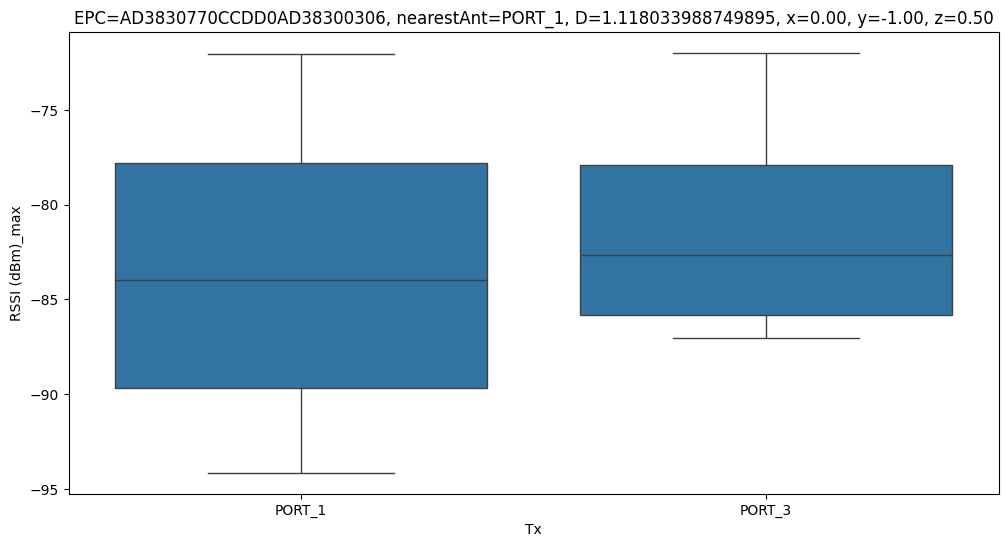

In [ ]:
plt.figure(figsize=(12,6))

run = pd.Series(Runs['run'].unique()).sample(1).values[0]
RSSImax_TxRx_run = RSSImax_TxRx [RSSImax_TxRx['run']==run]

EPC = pd.Series(RSSImax_TxRx_run['EPC'].unique()).sample(1).values[0]
RSSImax_TxRx_run_EPC = RSSImax_TxRx_run [RSSImax_TxRx_run['EPC']==EPC]

Actuals_pick = Actuals_antConf_Runs [ (Actuals_antConf_Runs['run']==run) & (Actuals_antConf_Runs['EPC']==EPC) ]
nearestAnt = Actuals_pick['nearestAnt'].values[0]
x = Actuals_pick['x'].values[0]
y = Actuals_pick['y'].values[0]
z = Actuals_pick['z'].values[0]
D = Actuals_pick[f'D_{nearestAnt}'].values[0]
sns.boxplot(data=RSSImax_TxRx_run_EPC, x='Tx', y='RSSI (dBm)_max')
plt.title(f'EPC={EPC}, nearestAnt={nearestAnt}, D={D}, x={x:.2f}, y={y:.2f}, z={z:.2f}')
plt.xlabel('Tx')
plt.ylabel('RSSI (dBm)_max' )
plt.show()

RSSImax_Tx

In [ ]:
tags_TxRx[:1]

,run,EPC,datestamp,Tx,Rx,RSSI (dBm)
0,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,2025-11-18 12:13:35.294,PORT_1,PORT_1,-73.58


In [ ]:
# tags_mono = tags_TxRx [tags_TxRx['Tx']==tags_TxRx['Rx']]
# tags_mono.head()

In [ ]:
RSSImax_Tx = tags_TxRx.groupby(['run', 'EPC']).apply(lambda x:x.nlargest(1, 'RSSI (dBm)')).reset_index(drop=True).rename(columns={'RSSI (dBm)':'RSSI (dBm)_max'})
RSSImax_Tx = pd.merge(RSSImax_Tx, Actuals_antConf_Runs, on=['run', 'EPC'])
RSSImax_Tx.head()

/tmp/ipython-input-3809140435.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  RSSImax_Tx = tags_TxRx.groupby(['run', 'EPC']).apply(lambda x:x.nlargest(1, 'RSSI (dBm)')).reset_index(drop=True).rename(columns={'RSSI (dBm)':'RSSI (dBm)_max'})


,run,EPC,datestamp,Tx,Rx,RSSI (dBm)_max,ConfID,x,y,z,D_PORT_1,D_PORT_2,D_PORT_3,D_PORT_4,nearestAnt,D_nearestAnt
0,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,2025-11-18 12:14:12.047,PORT_1,PORT_1,-70.48,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5
1,2025-11-18 12:13:35,AD3830770CCDD0AD38300247,2025-11-18 12:13:36.386,PORT_2,PORT_2,-71.43,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5
2,2025-11-18 12:13:35,AD3830770CCDD0AD38300250,2025-11-18 12:14:02.107,PORT_1,PORT_1,-72.48,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5
3,2025-11-18 12:13:35,AD3830770CCDD0AD3830028B,2025-11-18 12:13:56.627,PORT_1,PORT_1,-69.01,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5
4,2025-11-18 12:13:35,AD3830770CCDD0AD383002AD,2025-11-18 12:14:01.347,PORT_1,PORT_1,-68.96,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5


pick

In [ ]:
RSSImax_Tx_pick = RSSImax_Tx.copy()
# RSSImax_Tx_pick = RSSImax_Tx [(abs(RSSImax_Tx['x'])<=1) & (abs(RSSImax_Tx['y'])<=1)]

In [ ]:
  (RSSImax_Tx_pick['Tx']==RSSImax_Tx_pick['nearestAnt']).mean()

np.float64(0.2658569500674764)

NSEW (if present)

In [ ]:
antConf[['Antenna', 'direction']]

,Antenna,direction
0,PORT_1,NaN
1,PORT_2,NaN
2,PORT_3,NaN
3,PORT_4,NaN


In [ ]:
RSSImax_Tx_pick = pd.merge(RSSImax_Tx_pick, antConf[['Antenna', 'direction']], left_on='Tx', right_on='Antenna')
RSSImax_Tx_pick.head()
#

,run,EPC,datestamp,Tx,Rx,RSSI (dBm)_max,ConfID,x,y,z,D_PORT_1,D_PORT_2,D_PORT_3,D_PORT_4,nearestAnt,D_nearestAnt,Antenna,direction
0,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,2025-11-18 12:14:12.047,PORT_1,PORT_1,-70.48,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5,PORT_1,NaN
1,2025-11-18 12:13:35,AD3830770CCDD0AD38300247,2025-11-18 12:13:36.386,PORT_2,PORT_2,-71.43,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5,PORT_2,NaN
2,2025-11-18 12:13:35,AD3830770CCDD0AD38300250,2025-11-18 12:14:02.107,PORT_1,PORT_1,-72.48,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5,PORT_1,NaN
3,2025-11-18 12:13:35,AD3830770CCDD0AD3830028B,2025-11-18 12:13:56.627,PORT_1,PORT_1,-69.01,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5,PORT_1,NaN
4,2025-11-18 12:13:35,AD3830770CCDD0AD383002AD,2025-11-18 12:14:01.347,PORT_1,PORT_1,-68.96,2025-10-21 14h00,0.0,0.0,0.5,1.5,1.5,1.5,1.5,PORT_1,1.5,PORT_1,NaN


In [ ]:
RSSImax_Tx_pick

,run,EPC,datestamp,Tx,Rx,RSSI (dBm)_max,ConfID,x,y,z,D_PORT_1,D_PORT_2,D_PORT_3,D_PORT_4,nearestAnt,D_nearestAnt,Antenna,direction
0,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,2025-11-18 12:14:12.047,PORT_1,PORT_1,-70.48,2025-10-21 14h00,0.0,0.0,0.5,1.500000,1.500000,1.500000,1.500000,PORT_1,1.500000,PORT_1,NaN
1,2025-11-18 12:13:35,AD3830770CCDD0AD38300247,2025-11-18 12:13:36.386,PORT_2,PORT_2,-71.43,2025-10-21 14h00,0.0,0.0,0.5,1.500000,1.500000,1.500000,1.500000,PORT_1,1.500000,PORT_2,NaN
2,2025-11-18 12:13:35,AD3830770CCDD0AD38300250,2025-11-18 12:14:02.107,PORT_1,PORT_1,-72.48,2025-10-21 14h00,0.0,0.0,0.5,1.500000,1.500000,1.500000,1.500000,PORT_1,1.500000,PORT_1,NaN
3,2025-11-18 12:13:35,AD3830770CCDD0AD3830028B,2025-11-18 12:13:56.627,PORT_1,PORT_1,-69.01,2025-10-21 14h00,0.0,0.0,0.5,1.500000,1.500000,1.500000,1.500000,PORT_1,1.500000,PORT_1,NaN
4,2025-11-18 12:13:35,AD3830770CCDD0AD383002AD,2025-11-18 12:14:01.347,PORT_1,PORT_1,-68.96,2025-10-21 14h00,0.0,0.0,0.5,1.500000,1.500000,1.500000,1.500000,PORT_1,1.500000,PORT_1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2025-11-18 13:57:55,AD3830770CCDD0AD383002DF,2025-11-18 13:57:56.925,PORT_4,PORT_4,-69.93,2025-10-21 14h00,2.0,2.0,2.5,4.924429,4.031129,2.872281,4.031129,PORT_3,2.872281,PORT_4,NaN
737,2025-11-18 13:57:55,AD3830770CCDD0AD38300306,2025-11-18 13:58:11.305,PORT_2,PORT_2,-76.69,2025-10-21 14h00,2.0,2.0,2.5,4.924429,4.031129,2.872281,4.031129,PORT_3,2.872281,PORT_2,NaN
738,2025-11-18 13:57:55,AD3830770CCDD0AD38300348,2025-11-18 13:58:04.245,PORT_4,PORT_4,-75.08,2025-10-21 14h00,2.0,2.0,2.5,4.924429,4.031129,2.872281,4.031129,PORT_3,2.872281,PORT_4,NaN
739,2025-11-18 13:57:55,AD3830770CCDD0AD383003F8,2025-11-18 13:58:06.486,PORT_4,PORT_4,-74.42,2025-10-21 14h00,2.0,2.0,2.5,4.924429,4.031129,2.872281,4.031129,PORT_3,2.872281,PORT_4,NaN


In [ ]:
RSSImax_Tx_pick = RSSImax_Tx_pick.reset_index(drop=True)

crit = (RSSImax_Tx_pick['x']>0) & (RSSImax_Tx_pick['y']>0)
idx_crit = RSSImax_Tx_pick[crit].index
idx_crit
RSSImax_Tx_pick.loc[idx_crit, 'loc NSEW'] = 'NE'

crit = (RSSImax_Tx_pick['x']>0) & (RSSImax_Tx_pick['y']<0)
idx_crit = RSSImax_Tx_pick[crit].index
RSSImax_Tx_pick.loc[idx_crit, 'loc NSEW'] = 'SE'

crit = (RSSImax_Tx_pick['x']<0) & (RSSImax_Tx_pick['y']<0)
idx_crit = RSSImax_Tx_pick[crit].index
RSSImax_Tx_pick.loc[idx_crit, 'loc NSEW'] = 'SW'

crit = (RSSImax_Tx_pick['x']<0) & (RSSImax_Tx_pick['y']>0)
idx_crit = RSSImax_Tx_pick[crit].index
RSSImax_Tx_pick.loc[idx_crit, 'loc NSEW'] = 'NW'

RSSImax_Tx_pick

,run,EPC,datestamp,Tx,Rx,RSSI (dBm)_max,ConfID,x,y,z,D_PORT_1,D_PORT_2,D_PORT_3,D_PORT_4,nearestAnt,D_nearestAnt,Antenna,direction,loc NSEW
0,2025-11-18 12:13:35,AD3830770CCDD0AD383001D9,2025-11-18 12:14:12.047,PORT_1,PORT_1,-70.48,2025-10-21 14h00,0.0,0.0,0.5,1.500000,1.500000,1.500000,1.500000,PORT_1,1.500000,PORT_1,NaN,NaN
1,2025-11-18 12:13:35,AD3830770CCDD0AD38300247,2025-11-18 12:13:36.386,PORT_2,PORT_2,-71.43,2025-10-21 14h00,0.0,0.0,0.5,1.500000,1.500000,1.500000,1.500000,PORT_1,1.500000,PORT_2,NaN,NaN
2,2025-11-18 12:13:35,AD3830770CCDD0AD38300250,2025-11-18 12:14:02.107,PORT_1,PORT_1,-72.48,2025-10-21 14h00,0.0,0.0,0.5,1.500000,1.500000,1.500000,1.500000,PORT_1,1.500000,PORT_1,NaN,NaN
3,2025-11-18 12:13:35,AD3830770CCDD0AD3830028B,2025-11-18 12:13:56.627,PORT_1,PORT_1,-69.01,2025-10-21 14h00,0.0,0.0,0.5,1.500000,1.500000,1.500000,1.500000,PORT_1,1.500000,PORT_1,NaN,NaN
4,2025-11-18 12:13:35,AD3830770CCDD0AD383002AD,2025-11-18 12:14:01.347,PORT_1,PORT_1,-68.96,2025-10-21 14h00,0.0,0.0,0.5,1.500000,1.500000,1.500000,1.500000,PORT_1,1.500000,PORT_1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2025-11-18 13:57:55,AD3830770CCDD0AD383002DF,2025-11-18 13:57:56.925,PORT_4,PORT_4,-69.93,2025-10-21 14h00,2.0,2.0,2.5,4.924429,4.031129,2.872281,4.031129,PORT_3,2.872281,PORT_4,NaN,NE
737,2025-11-18 13:57:55,AD3830770CCDD0AD38300306,2025-11-18 13:58:11.305,PORT_2,PORT_2,-76.69,2025-10-21 14h00,2.0,2.0,2.5,4.924429,4.031129,2.872281,4.031129,PORT_3,2.872281,PORT_2,NaN,NE
738,2025-11-18 13:57:55,AD3830770CCDD0AD38300348,2025-11-18 13:58:04.245,PORT_4,PORT_4,-75.08,2025-10-21 14h00,2.0,2.0,2.5,4.924429,4.031129,2.872281,4.031129,PORT_3,2.872281,PORT_4,NaN,NE
739,2025-11-18 13:57:55,AD3830770CCDD0AD383003F8,2025-11-18 13:58:06.486,PORT_4,PORT_4,-74.42,2025-10-21 14h00,2.0,2.0,2.5,4.924429,4.031129,2.872281,4.031129,PORT_3,2.872281,PORT_4,NaN,NE


In [ ]:
RSSImax_Tx_pick.groupby('loc NSEW').size()

,0
loc NSEW,
NE,115
NW,120
SE,118
SW,118


In [ ]:
(RSSImax_Tx_pick ['loc NSEW'] == RSSImax_Tx_pick ['direction']).mean()

np.float64(0.0)

## TX antennas per EPC

In [ ]:
tags.groupby(['run', 'EPC']) ['Tx'].nunique().describe()

,Tx
count,741.000000
mean,2.835358
std,0.994521
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


## Uzair

In [ ]:

# Sanity Check - EPC Completeness

print("\n CHECKING EPC COMPLETENESS")
epc_counts = tags.groupby('run')['EPC'].nunique().reset_index()
expected_tags = 10

# Identify runs with missing tags
missing_mask = epc_counts['EPC'] < expected_tags
bad_runs = epc_counts[missing_mask]

print(f"Total Runs: {len(epc_counts)}")
print(f"Runs with full {expected_tags} tags: {len(epc_counts) - len(bad_runs)}")
if not bad_runs.empty:
    print(f"WARNING: {len(bad_runs)} runs have < {expected_tags} unique EPCs.")
    print(bad_runs.head()) # Printing first few bad runs
else:
    print("SUCCESS: All runs have complete EPC coverage.")



 CHECKING EPC COMPLETENESS
Total Runs: 75
Runs with full 10 tags: 68
                   run  EPC
10 2025-11-18 12:37:07    9
14 2025-11-18 12:41:19    9
17 2025-11-18 12:46:28    9
18 2025-11-18 12:47:20    7
26 2025-11-18 13:10:18    9


## UZAIR: analysis shoud be done by (run, EPC) using RSSImax_TxRx


 RSSI BOXPLOTS (Tx vs Rx per EPC)
Generating plots for 10 unique EPCs...


/tmp/ipython-input-3652943762.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


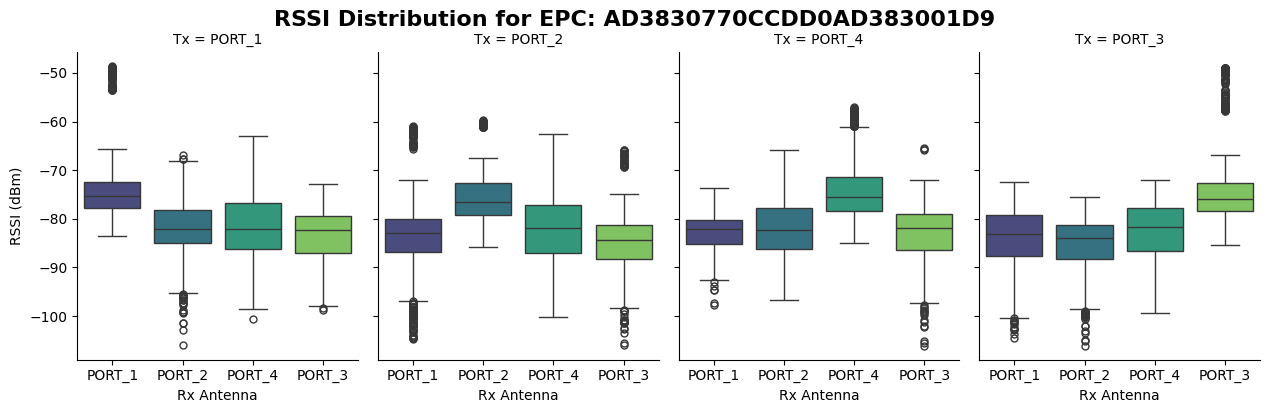

Displayed plot for AD3830770CCDD0AD383001D9


/tmp/ipython-input-3652943762.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


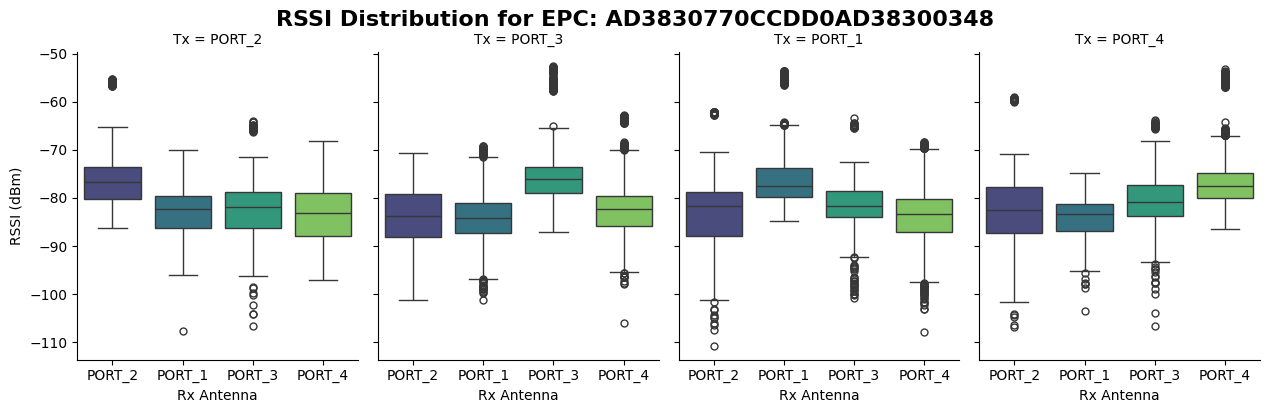

Displayed plot for AD3830770CCDD0AD38300348


/tmp/ipython-input-3652943762.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


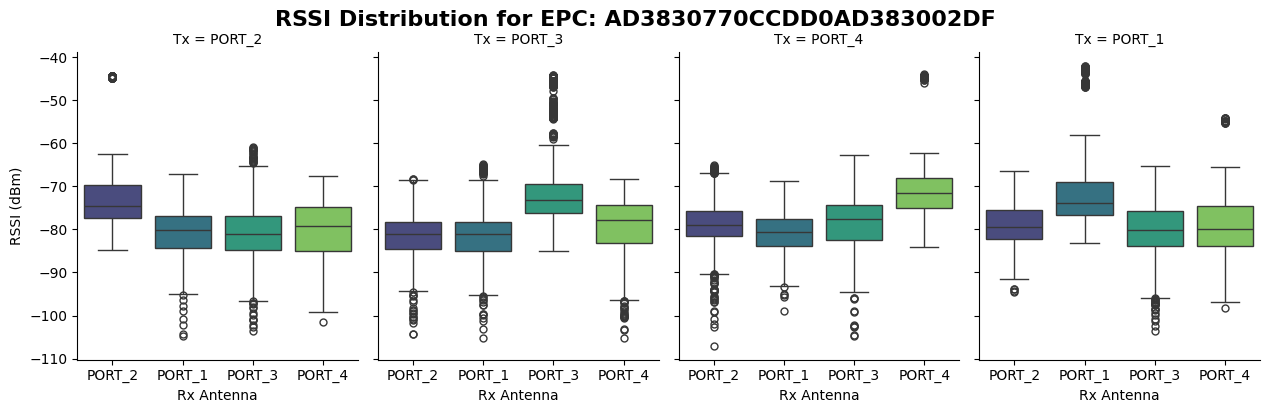

Displayed plot for AD3830770CCDD0AD383002DF


/tmp/ipython-input-3652943762.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


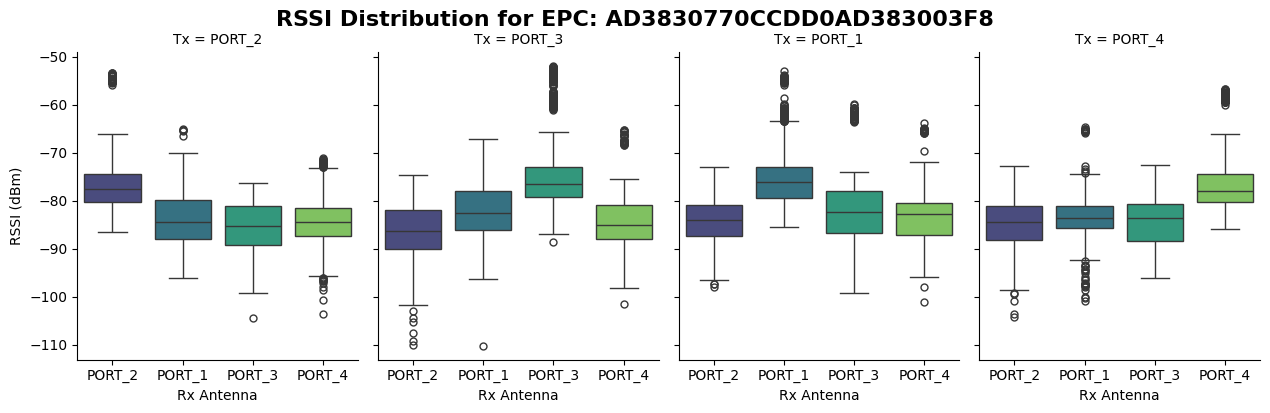

Displayed plot for AD3830770CCDD0AD383003F8


/tmp/ipython-input-3652943762.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


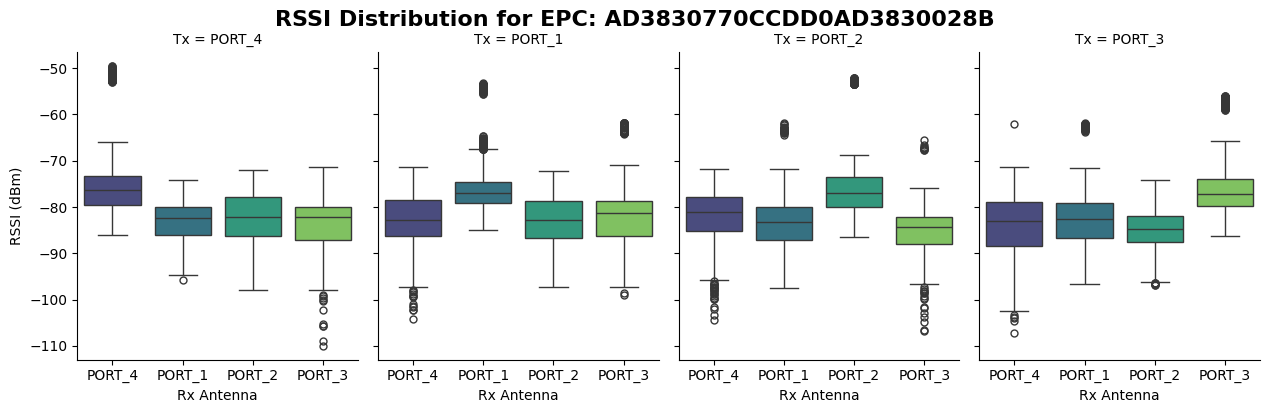

Displayed plot for AD3830770CCDD0AD3830028B


/tmp/ipython-input-3652943762.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


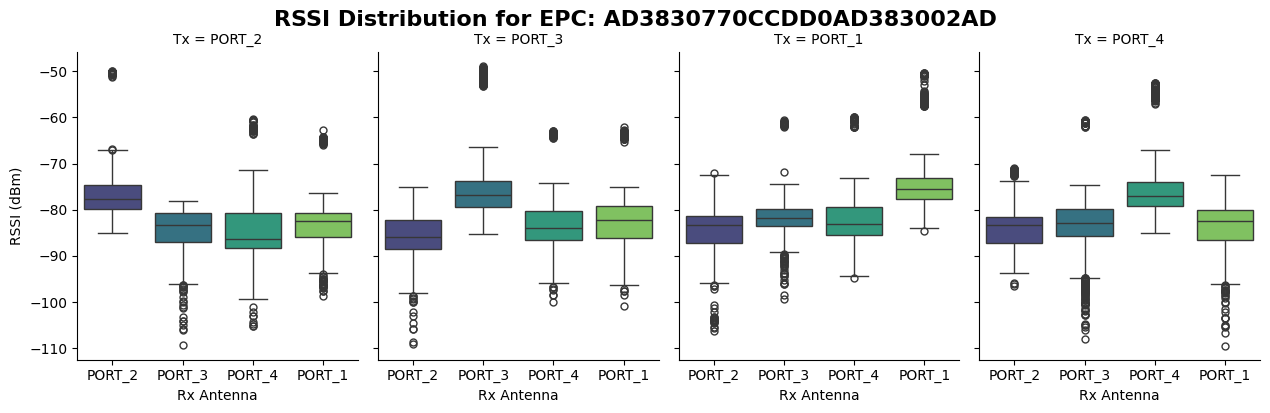

Displayed plot for AD3830770CCDD0AD383002AD


/tmp/ipython-input-3652943762.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


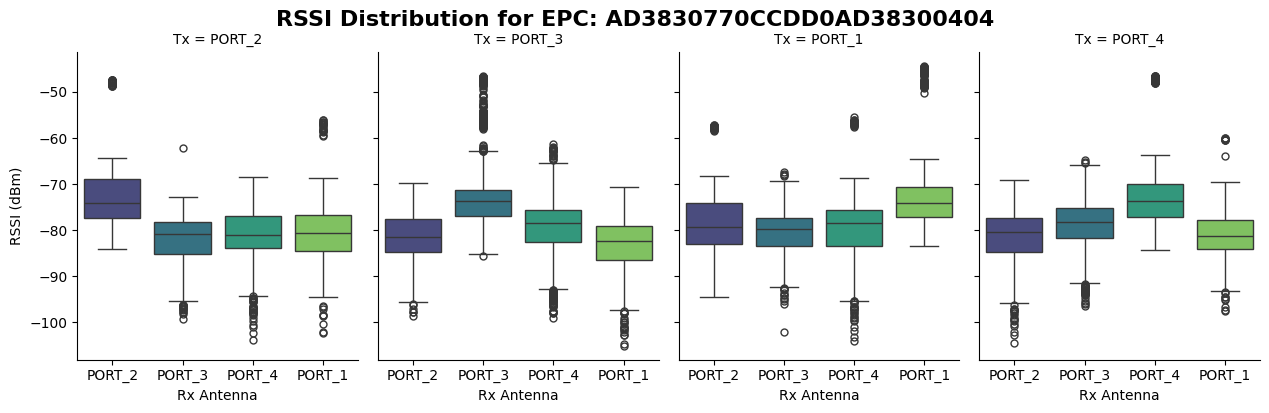

Displayed plot for AD3830770CCDD0AD38300404


/tmp/ipython-input-3652943762.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


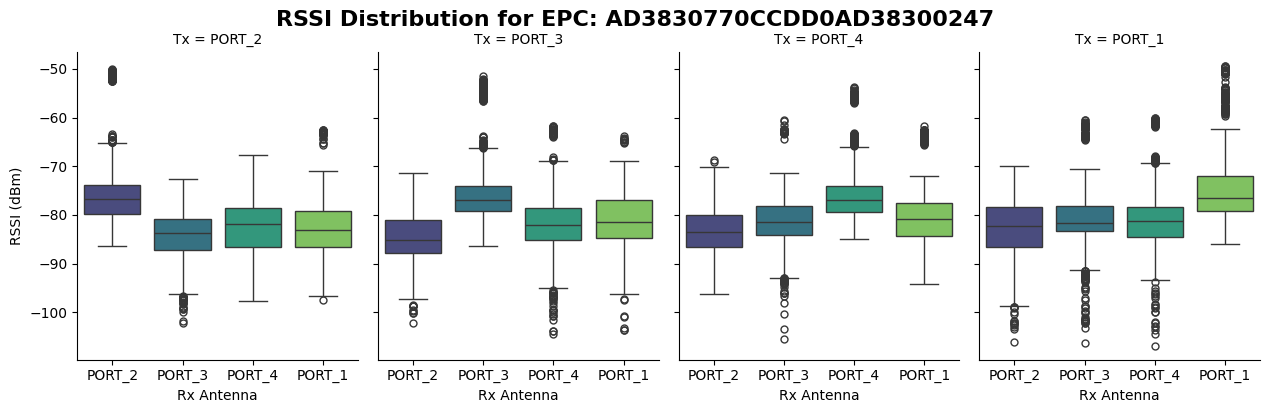

Displayed plot for AD3830770CCDD0AD38300247


/tmp/ipython-input-3652943762.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


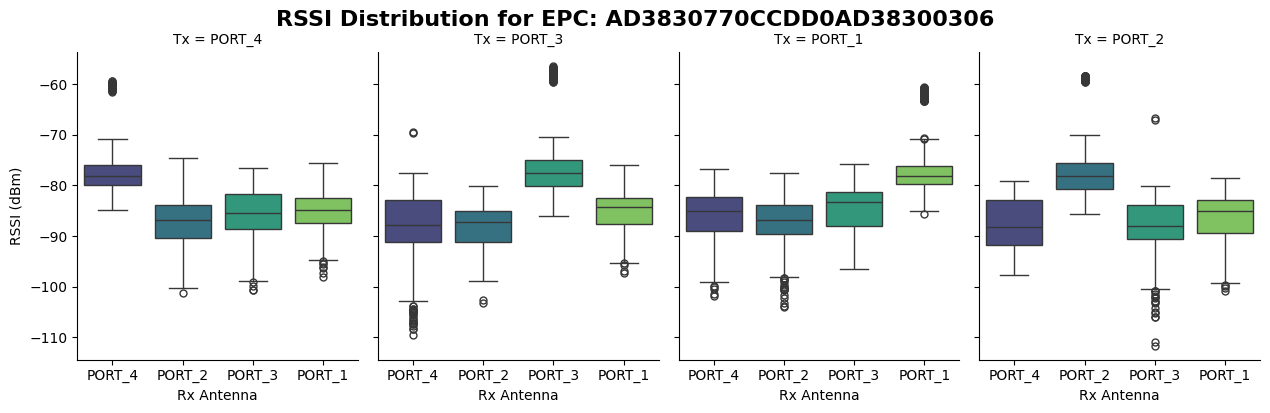

Displayed plot for AD3830770CCDD0AD38300306


/tmp/ipython-input-3652943762.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


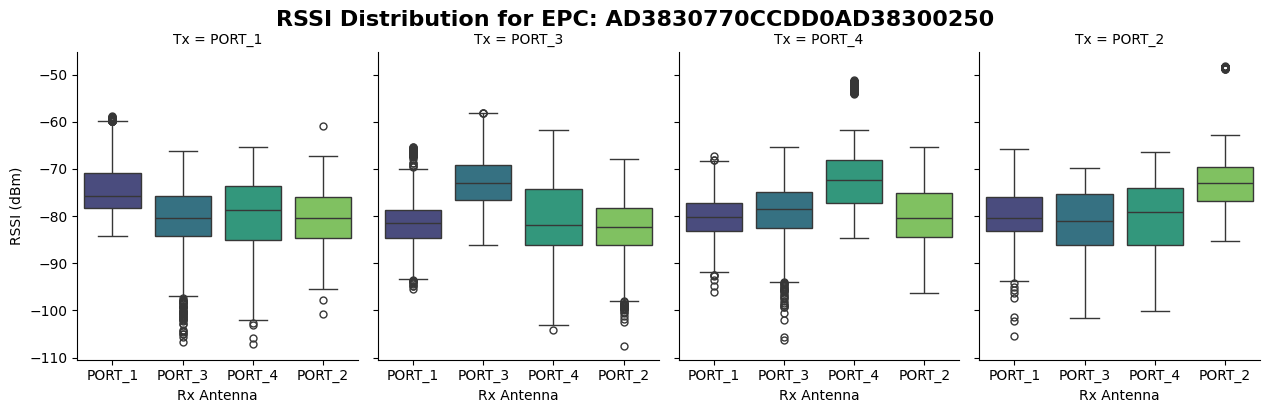

Displayed plot for AD3830770CCDD0AD38300250


In [ ]:

# RSSI Visualization (Boxplots)

print("\n RSSI BOXPLOTS (Tx vs Rx per EPC)")
import seaborn as sns
import matplotlib.pyplot as plt


all_epcs = tags['EPC'].unique()
print(f"Generating plots for {len(all_epcs)} unique EPCs...")

# Loop through EVERY EPC
for epc in all_epcs:
    # Filter data for this specific tag
    subset = tags_TxRx[tags_TxRx['EPC'] == epc].copy()

    # Skip if no data (just in case)
    if subset.empty:
        print(f"Skipping {epc} (No data)")
        continue

    # Create the Plot
    # kind='box': Boxplot
    # col='Tx': Creates a separate subplot for each Tx antenna automatically
    # col_wrap=4: Keeps them in one row (since you have 4 Tx)
    g = sns.catplot(
        data=subset,
        x='Rx',
        y='RSSI (dBm)',
        col='Tx',
        kind='box',
        col_wrap=4,
        height=4,
        aspect=0.8,
        palette='viridis',
        sharey=True
    )

    # Formatting
    g.fig.suptitle(f"RSSI Distribution for EPC: {epc}", y=1.02, fontsize=16, fontweight='bold')
    g.set_axis_labels("Rx Antenna", "RSSI (dBm)")

    plt.show() # Render the plot
    print(f"Displayed plot for {epc}")



# ds

In [ ]:
tags[:1]

,run,EPC,datestamp,Tx,rx1_ant,rssi1 (dBm),rssi1,rx2_ant,rssi2 (dBm),rssi2,...,ConfID,x,y,z,D_PORT_1,D_PORT_2,D_PORT_3,D_PORT_4,nearestAnt,D_nearestAnt
0,2025-11-18 14:22:42,AD3830770CCDD0AD383001D9,2025-11-18 14:22:43.489,PORT_1,PORT_1,-72.34,0.058345,PORT_2,-90.98,0.000798,...,2025-11-18,-1.0,-1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281


In [ ]:
# PX
aggfunc_list = [max, min, np.mean]
# aggfunc_list = [max, min]
# aggfunc_list = [max]
# aggfunc_list = [np.mean]

# HQ
# aggfunc_list = [max]

ds = pd.pivot_table(tags, index=['run', 'EPC'], columns=['Tx', 'rx1_ant', 'rx2_ant'], \
                              values=['rssi1', 'rssi2', 'Delta_rssi', 'rssi1 (dBm)', 'rssi2 (dBm)', 'Delta_rssi (dBm)'], aggfunc=aggfunc_list)

Xcols_ds = ['__'.join(x) for x in ds.columns]
ds.columns = Xcols_ds

for col in Xcols_ds:
  if 'dBm' in col:
    fill_value=-130
  else:
    fill_value=0
  ds[col] = ds[col].fillna(fill_value)

ds = ds.reset_index(drop=False)
ds


/tmp/ipython-input-1829158732.py:10: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ds = pd.pivot_table(tags, index=['run', 'EPC'], columns=['Tx', 'rx1_ant', 'rx2_ant'], \
/tmp/ipython-input-1829158732.py:10: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ds = pd.pivot_table(tags, index=['run', 'EPC'], columns=['Tx', 'rx1_ant', 'rx2_ant'], \
/tmp/ipython-input-1829158732.py:10: FutureWarning: The provided callable <function mean at 0x7beef8b1f880> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" inst

,run,EPC,max__Delta_rssi__PORT_1__PORT_1__PORT_2,max__Delta_rssi__PORT_1__PORT_1__PORT_3,max__Delta_rssi__PORT_1__PORT_1__PORT_4,max__Delta_rssi__PORT_2__PORT_2__PORT_1,max__Delta_rssi__PORT_2__PORT_2__PORT_3,max__Delta_rssi__PORT_2__PORT_2__PORT_4,max__Delta_rssi__PORT_3__PORT_3__PORT_1,max__Delta_rssi__PORT_3__PORT_3__PORT_2,...,mean__rssi2 (dBm)__PORT_1__PORT_1__PORT_4,mean__rssi2 (dBm)__PORT_2__PORT_2__PORT_1,mean__rssi2 (dBm)__PORT_2__PORT_2__PORT_3,mean__rssi2 (dBm)__PORT_2__PORT_2__PORT_4,mean__rssi2 (dBm)__PORT_3__PORT_3__PORT_1,mean__rssi2 (dBm)__PORT_3__PORT_3__PORT_2,mean__rssi2 (dBm)__PORT_3__PORT_3__PORT_4,mean__rssi2 (dBm)__PORT_4__PORT_4__PORT_1,mean__rssi2 (dBm)__PORT_4__PORT_4__PORT_2,mean__rssi2 (dBm)__PORT_4__PORT_4__PORT_3
0,2025-11-18 14:22:42,AD3830770CCDD0AD383001D9,0.168971,0.114104,0.128817,0.000000,0.000000,0.000000,0.112075,0.183858,...,-81.397778,-130.000000,-130.000000,-130.000000,-74.371000,-87.186667,-79.135000,-78.307308,-89.379231,-76.321154
1,2025-11-18 14:22:42,AD3830770CCDD0AD38300247,0.128352,0.119636,0.143752,0.000000,0.000000,0.000000,0.010445,0.015606,...,-89.903077,-130.000000,-130.000000,-130.000000,-75.967222,-94.473333,-89.860000,-130.000000,-130.000000,-130.000000
2,2025-11-18 14:22:42,AD3830770CCDD0AD38300250,0.050739,0.022958,0.086964,0.067184,0.032158,0.063066,0.168998,0.132631,...,-84.411111,-79.872917,-73.824348,-81.884800,-79.172778,-76.575833,-80.719048,-82.166818,-81.391000,-76.138696
3,2025-11-18 14:22:42,AD3830770CCDD0AD3830028B,0.049711,0.049721,0.048081,0.011394,0.012866,0.011134,0.031262,0.034545,...,-86.615789,-82.154167,-81.358182,-88.980000,-79.868235,-84.199615,-84.552000,-82.803333,-88.950000,-84.150000
4,2025-11-18 14:22:42,AD3830770CCDD0AD383002AD,0.080266,0.073340,0.087862,0.015226,0.009704,0.040638,0.064453,0.089956,...,-85.408333,-79.854286,-79.177895,-88.182000,-76.689200,-84.160500,-84.139500,-81.430000,-90.020000,-80.489000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2025-11-18 15:14:19,AD3830770CCDD0AD383002DF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-130.000000,-130.000000,-130.000000,-130.000000,-130.000000,-130.000000,-130.000000,-130.000000,-90.580000,-91.540000
728,2025-11-18 15:14:19,AD3830770CCDD0AD38300306,0.000000,0.000000,0.000000,0.007231,0.005563,0.009433,0.000000,0.000000,...,-130.000000,-88.270000,-96.900000,-89.640000,-130.000000,-130.000000,-130.000000,-130.000000,-130.000000,-130.000000
729,2025-11-18 15:14:19,AD3830770CCDD0AD38300348,0.003800,0.000000,0.006591,0.067706,0.049560,0.063116,0.004480,0.012026,...,-87.300000,-86.811429,-86.983704,-84.088214,-92.750000,-82.914615,-86.012500,-89.708333,-81.610435,-85.733810
730,2025-11-18 15:14:19,AD3830770CCDD0AD383003F8,-0.001412,0.000000,0.012795,0.135880,0.113369,0.098933,0.000000,0.000000,...,-85.100000,-85.894444,-95.162778,-82.912667,-130.000000,-130.000000,-130.000000,-87.436154,-79.096250,-89.887500


In [ ]:
Xcols_ds_lin = [x for x in Xcols_ds if 'dBm' not in x]
Xcols_ds_dBm = [x for x in Xcols_ds if 'dBm' in x]
len(Xcols_ds), Xcols_ds[:2], len(Xcols_ds_lin), Xcols_ds_lin[:2], len(Xcols_ds_dBm), Xcols_ds_dBm[:2]

(216,
 ['max__Delta_rssi__PORT_1__PORT_1__PORT_2',
  'max__Delta_rssi__PORT_1__PORT_1__PORT_3'],
 108,
 ['max__Delta_rssi__PORT_1__PORT_1__PORT_2',
  'max__Delta_rssi__PORT_1__PORT_1__PORT_3'],
 108,
 ['max__Delta_rssi (dBm)__PORT_1__PORT_1__PORT_2',
  'max__Delta_rssi (dBm)__PORT_1__PORT_1__PORT_3'])

In [ ]:
ds = pd.merge(ds, Actuals_antConf_Runs, on=['run', 'EPC'])
ds.head()

,run,EPC,max__Delta_rssi__PORT_1__PORT_1__PORT_2,max__Delta_rssi__PORT_1__PORT_1__PORT_3,max__Delta_rssi__PORT_1__PORT_1__PORT_4,max__Delta_rssi__PORT_2__PORT_2__PORT_1,max__Delta_rssi__PORT_2__PORT_2__PORT_3,max__Delta_rssi__PORT_2__PORT_2__PORT_4,max__Delta_rssi__PORT_3__PORT_3__PORT_1,max__Delta_rssi__PORT_3__PORT_3__PORT_2,...,ConfID,x,y,z,D_PORT_1,D_PORT_2,D_PORT_3,D_PORT_4,nearestAnt,D_nearestAnt
0,2025-11-18 14:22:42,AD3830770CCDD0AD383001D9,0.168971,0.114104,0.128817,0.000000,0.000000,0.000000,0.112075,0.183858,...,2025-11-18,-1.0,-1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281
1,2025-11-18 14:22:42,AD3830770CCDD0AD38300247,0.128352,0.119636,0.143752,0.000000,0.000000,0.000000,0.010445,0.015606,...,2025-11-18,-1.0,-1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281
2,2025-11-18 14:22:42,AD3830770CCDD0AD38300250,0.050739,0.022958,0.086964,0.067184,0.032158,0.063066,0.168998,0.132631,...,2025-11-18,-1.0,-1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281
3,2025-11-18 14:22:42,AD3830770CCDD0AD3830028B,0.049711,0.049721,0.048081,0.011394,0.012866,0.011134,0.031262,0.034545,...,2025-11-18,-1.0,-1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281
4,2025-11-18 14:22:42,AD3830770CCDD0AD383002AD,0.080266,0.073340,0.087862,0.015226,0.009704,0.040638,0.064453,0.089956,...,2025-11-18,-1.0,-1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281


In [ ]:
tags[['Tx', 'rx1_ant', 'rx2_ant']].drop_duplicates().sort_values(['Tx', 'rx1_ant', 'rx2_ant']).reset_index(drop=True)

,Tx,rx1_ant,rx2_ant
0,PORT_1,PORT_1,PORT_2
1,PORT_1,PORT_1,PORT_3
2,PORT_1,PORT_1,PORT_4
3,PORT_2,PORT_2,PORT_1
4,PORT_2,PORT_2,PORT_3
5,PORT_2,PORT_2,PORT_4
6,PORT_3,PORT_3,PORT_1
7,PORT_3,PORT_3,PORT_2
8,PORT_3,PORT_3,PORT_4
9,PORT_4,PORT_4,PORT_1


In [ ]:
ds.shape

(732, 228)

# classification (low meaning) on xyz class

In [ ]:
ds['xyz'] = ds[['x', 'y', 'z']].apply(lambda x:'__'.join([str(y) for y in x]), axis=1)
target='xyz'

ds_pick

In [ ]:
# all
ds_pick = ds.copy()

# inside square
# ds_pick = ds [(abs(ds['x'])<=1) & (abs(ds['y'])<=1)]

# inside square + z
# ds_pick = ds [(abs(ds['x'])<=1) & (abs(ds['y'])<=1) & (abs(ds['z'])<=1.5)]

# z only
# ds_pick = ds [(abs(ds['z'])<=1.5)]

In [ ]:
Xcols_ds_pick = Xcols_ds_lin

In [ ]:
clf = RandomForestClassifier()
X=ds_pick[Xcols_ds_pick]
y=ds_pick[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
(y_test == y_pred).mean()

np.float64(0.16778523489932887)

In [ ]:
ds_pick['xyz'].nunique()

75

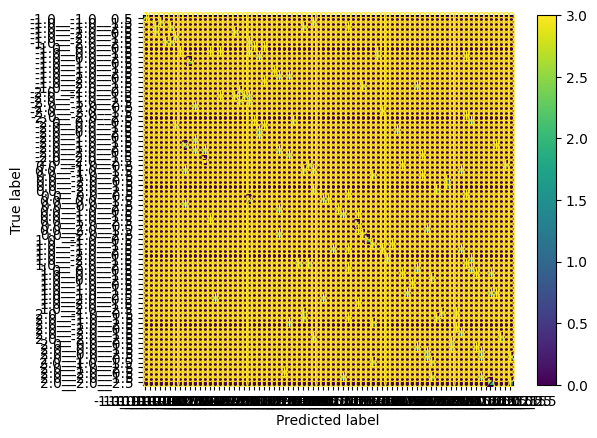

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# **Regression Added by Uzair**


In [ ]:
ds_pick = ds.copy()
Xcols_ds_pick = Xcols_ds
target='xyz'

In [ ]:
# Regression (RF, ET, GB, KNN, Ridge, DecisionTree, NN)

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X_reg = ds[Xcols_ds_pick].values
y_reg = ds[['x', 'y', 'z']].values
idx_all = ds.index.to_numpy()   # keep track of original indices

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X_reg, y_reg, idx_all,
    test_size=0.2,
    random_state=0
)


# Define candidate regressors

regressors = {
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=0),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=200, random_state=0),
    "GradientBoosting": GradientBoostingRegressor(random_state=0),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Ridge": Ridge(alpha=1.0),
    "DecisionTree": DecisionTreeRegressor(random_state=0),
    "NN": MLPRegressor(
        hidden_layer_sizes=(64, 64),
        activation='relu',
        random_state=0,
        max_iter=1000,
        early_stopping=True
    ),
}

reg_results = {}    # RMSE per model
reg_errors = {}     # per-sample 3D distance error per model
y_pred_store = {}   # store predictions per model
best_model = None   # trained RandomForest model


for name, base_reg in regressors.items():
    model = MultiOutputRegressor(base_reg)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # 3D RMSE on (x, y, z)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    reg_results[name] = rmse

    # per-sample Euclidean distance in 3D
    dists = np.linalg.norm(y_pred - y_test, axis=1)
    reg_errors[name] = dists

    # store predictions for later analysis (Task 3 & 4)
    y_pred_store[name] = y_pred

    print(
        f"{name}: 3D RMSE = {rmse:.3f} m, "
        f"mean |error| = {dists.mean():.3f} m, "
        f"median |error| = {np.median(dists):.3f} m"
    )

    # keep RandomForest as final model if it is good otherwise change it
    if name == "RandomForest":
        best_model = model

reg_results


RandomForest: 3D RMSE = 0.859 m, mean |error| = 1.333 m, median |error| = 1.220 m
ExtraTrees: 3D RMSE = 0.868 m, mean |error| = 1.340 m, median |error| = 1.247 m
GradientBoosting: 3D RMSE = 0.882 m, mean |error| = 1.369 m, median |error| = 1.323 m
KNN: 3D RMSE = 0.978 m, mean |error| = 1.509 m, median |error| = 1.400 m
Ridge: 3D RMSE = 1.096 m, mean |error| = 1.623 m, median |error| = 1.555 m
DecisionTree: 3D RMSE = 1.226 m, mean |error| = 1.825 m, median |error| = 1.414 m
NN: 3D RMSE = 1.521 m, mean |error| = 2.114 m, median |error| = 1.742 m


{'RandomForest': np.float64(0.8587313753113203),
 'ExtraTrees': np.float64(0.867631454042984),
 'GradientBoosting': np.float64(0.8821532322263809),
 'KNN': np.float64(0.9776015026515543),
 'Ridge': np.float64(1.0959086591547833),
 'DecisionTree': np.float64(1.226114066756428),
 'NN': np.float64(1.520619427449874)}

In [ ]:
antConf

,antennaID,x,y,z,key
0,PORT_1,-1,-1,0,1
1,PORT_2,-1,1,0,1
2,PORT_3,1,-1,0,1
3,PORT_4,1,1,0,1


In [ ]:
import numpy as np

# Antennas for the 2m square (case 3)
antennas_case1 = np.array([
    # for case 2 and 3
    # [ 0.0, -1.0, 0.0],  # South
    # [ 1.0,  0.0, 0.0],  # East
    # [ 0.0,  1.0, 0.0],  # North
    # [-1.0,  0.0, 0.0],  # West
    # for case 1
    [-1.0, -1.0, 0.0],   # A1
    [ 1.0, -1.0, 0.0],   # A2
    [ 1.0,  1.0, 0.0],   # A3
    [-1.0,  1.0, 0.0],   # A4
])

def nearest_antenna(points, antennas):
    d = np.linalg.norm(points[:,None,:] - antennas[None,:,:], axis=2)
    return np.argmin(d, axis=1)

# TRUE nearest antennas
true_nearest = nearest_antenna(y_test, antennas_case1)

# PRED nearest antennas for RandomForest only
rf_pred = y_pred_store["RandomForest"]
pred_nearest = nearest_antenna(rf_pred, antennas_case1)

# Zone accuracy
zone_accuracy = np.mean(true_nearest == pred_nearest)

print(f"RF – Antenna Zone Accuracy: {zone_accuracy*100:.2f}%")


RF – Antenna Zone Accuracy: 64.43%


In [ ]:
# Building a DataFrame with test errors for a given model

def build_error_df(model_name="RandomForest"):
    """
    Returns a DataFrame with, for each test sample:
    - original ds index
    - true (x,y,z)
    - predicted (x,y,z)
    - 3D error (Euclidean distance)
    """
    if model_name not in y_pred_store:
        raise ValueError(f"Unknown model '{model_name}'. Available: {list(y_pred_store.keys())}")

    y_pred = y_pred_store[model_name]
    dists = reg_errors[model_name]

    # Build DataFrame
    df_err = pd.DataFrame({
        "ds_index": idx_test,
        "x_true": y_test[:, 0],
        "y_true": y_test[:, 1],
        "z_true": y_test[:, 2],
        "x_pred": y_pred[:, 0],
        "y_pred": y_pred[:, 1],
        "z_pred": y_pred[:, 2],
        "error_3D": dists,
    })

    # Sort by descending error
    df_err = df_err.sort_values(by="error_3D", ascending=False).reset_index(drop=True)
    return df_err

# for RandomForest:
# df_err_rf = build_error_df("RandomForest")
# df_err_rf.head()

# for NN:
df_err_nn = build_error_df("NN")
df_err_nn.head()


,ds_index,x_true,y_true,z_true,x_pred,y_pred,z_pred,error_3D
0,103,-2.0,-2.0,0.5,0.153860,0.064056,1.545578,3.161119
1,558,-2.0,-2.0,2.5,0.156668,-0.344724,1.530773,2.886270
2,181,2.0,2.0,0.5,0.154841,0.108076,1.526531,2.835093
3,478,2.0,1.0,1.5,0.158649,-0.948666,1.564846,2.681805
4,303,-2.0,-2.0,1.5,0.162245,-0.456363,1.528910,2.656869


In [ ]:
#Inspecting worst-error samples for a given model

def show_worst_samples(model_name="RandomForest", k=5):
    df_err = build_error_df(model_name)
    worst = df_err.head(k)
    print(f"Worst {k} samples for model: {model_name}")
    display(worst)


    cols_to_show = ["EPC", "run"] if all(c in ds.columns for c in ["EPC", "run"]) else []
    if cols_to_show:
        print("\nWith original ds info:")
        display(
            worst.merge(ds[cols_to_show], left_on="ds_index", right_index=True, how="left")
        )

# show worst 5 for RandomForest
# show_worst_samples("RandomForest", k=5)
# show worst 5 for NN
show_worst_samples("NN", k=5)


Worst 5 samples for model: NN


,ds_index,x_true,y_true,z_true,x_pred,y_pred,z_pred,error_3D
0,103,-2.0,-2.0,0.5,0.153860,0.064056,1.545578,3.161119
1,558,-2.0,-2.0,2.5,0.156668,-0.344724,1.530773,2.886270
2,181,2.0,2.0,0.5,0.154841,0.108076,1.526531,2.835093
3,478,2.0,1.0,1.5,0.158649,-0.948666,1.564846,2.681805
4,303,-2.0,-2.0,1.5,0.162245,-0.456363,1.528910,2.656869



With original ds info:


,ds_index,x_true,y_true,z_true,x_pred,y_pred,z_pred,error_3D,EPC,run
0,103,-2.0,-2.0,0.5,0.153860,0.064056,1.545578,3.161119,AD3830770CCDD0AD3830028B,2025-11-18 12:37:07
1,558,-2.0,-2.0,2.5,0.156668,-0.344724,1.530773,2.886270,AD3830770CCDD0AD38300348,2025-11-18 13:44:51
2,181,2.0,2.0,0.5,0.154841,0.108076,1.526531,2.835093,AD3830770CCDD0AD38300306,2025-11-18 12:47:20
3,478,2.0,1.0,1.5,0.158649,-0.948666,1.564846,2.681805,AD3830770CCDD0AD38300348,2025-11-18 13:28:16
4,303,-2.0,-2.0,1.5,0.162245,-0.456363,1.528910,2.656869,AD3830770CCDD0AD383001D9,2025-11-18 13:14:19


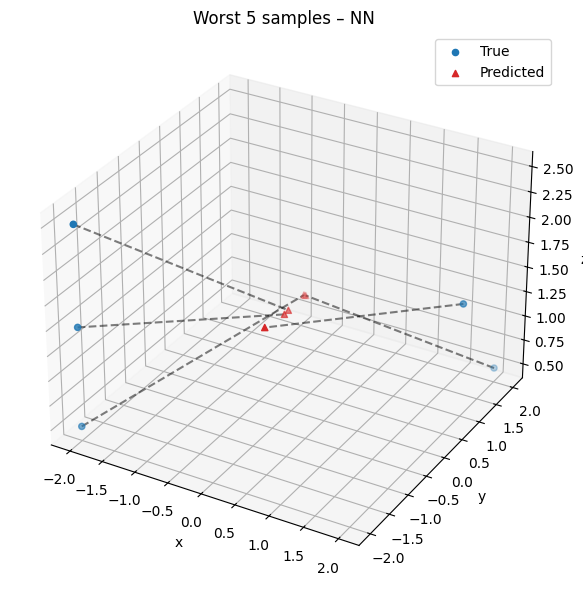

In [ ]:
# 3D scatter for worst samples (true vs pred positions) to check the error added for only refrence

from mpl_toolkits.mplot3d import Axes3D

def plot_worst_samples_3D(model_name="RandomForest", k=5):
    df_err = build_error_df(model_name)
    worst = df_err.head(k)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # True positions
    ax.scatter(
        worst["x_true"], worst["y_true"], worst["z_true"],
        c="tab:blue", marker="o", label="True"
    )
    # Predicted positions
    ax.scatter(
        worst["x_pred"], worst["y_pred"], worst["z_pred"],
        c="tab:red", marker="^", label="Predicted"
    )

    for _, row in worst.iterrows():
        ax.plot(
            [row["x_true"], row["x_pred"]],
            [row["y_true"], row["y_pred"]],
            [row["z_true"], row["z_pred"]],
            "k--", alpha=0.5
        )

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title(f"Worst {k} samples – {model_name}")
    ax.legend()
    plt.tight_layout()
    plt.show()

# PLoting for NN
plot_worst_samples_3D("NN", k=5)


In [ ]:
# #Cell-based granularity analysis (2m, 1m, 0.5m)

# def cell_accuracy(y_true, y_pred, cell_size):
#     """
#     Compute % of samples where true and predicted positions
#     fall into the same cell on a grid with given cell_size (in meters).
#     """
#     y_true = np.asarray(y_true)
#     y_pred = np.asarray(y_pred)


#     true_snapped = np.round(y_true / cell_size) * cell_size
#     pred_snapped = np.round(y_pred / cell_size) * cell_size


#     same_cell = np.all(true_snapped == pred_snapped, axis=1)
#     return same_cell.mean()

# def report_cell_accuracies(model_name="RandomForest", cell_sizes=(2.0, 1.0, 0.5)):
#     y_pred = y_pred_store[model_name]
#     print(f"Cell accuracy for model: {model_name}")
#     for G in cell_sizes:
#         acc = cell_accuracy(y_test, y_pred, G)
#         print(f"  grid {G:.2f} m: {acc*100:.1f}% of test points in correct cell")

# report_cell_accuracies("RandomForest", cell_sizes=(2.0, 1.0, 0.5))
# report_cell_accuracies("NN",          cell_sizes=(2.0, 1.0, 0.5))


In [ ]:

radii = [0.5, 1.0, 1.5, 2.0]

for name, dists in reg_errors.items():
    print(f"\n{name}:")
    for R in radii:
        frac = (dists <= R).mean()
        print(f"  within {R:.1f} m: {frac*100:.1f}% of test points")



RandomForest:
  within 0.5 m: 7.4% of test points
  within 1.0 m: 32.9% of test points
  within 1.5 m: 67.8% of test points
  within 2.0 m: 88.6% of test points

ExtraTrees:
  within 0.5 m: 7.4% of test points
  within 1.0 m: 36.2% of test points
  within 1.5 m: 65.8% of test points
  within 2.0 m: 89.9% of test points

GradientBoosting:
  within 0.5 m: 9.4% of test points
  within 1.0 m: 34.2% of test points
  within 1.5 m: 65.1% of test points
  within 2.0 m: 86.6% of test points

KNN:
  within 0.5 m: 6.7% of test points
  within 1.0 m: 30.2% of test points
  within 1.5 m: 63.1% of test points
  within 2.0 m: 83.2% of test points

Ridge:
  within 0.5 m: 2.7% of test points
  within 1.0 m: 12.8% of test points
  within 1.5 m: 31.5% of test points
  within 2.0 m: 44.3% of test points

DecisionTree:
  within 0.5 m: 10.1% of test points
  within 1.0 m: 29.5% of test points
  within 1.5 m: 52.3% of test points
  within 2.0 m: 64.4% of test points

NN:
  within 0.5 m: 3.4% of test points


## tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X = ds_pick[Xcols_ds_pick]
y = ds_pick[['x', 'y', 'z']].values

In [ ]:
clf = DecisionTreeRegressor()
clf.fit(X, y)
y_pred =  clf.predict(X)
np.sqrt(pd.Series([(x[0]**2+x[1]**2+x[2]**2)  for x in (y-y_pred)]).mean())

np.float64(0.0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
clf.fit(X_train, y_train)
y_pred =  clf.predict(X_test)
y_pred[:3]

array([[-2. ,  0. ,  2.5],
       [-1. ,  0. ,  0.5],
       [ 1. , -1. ,  1.5]])

In [ ]:
np.sqrt(pd.Series([(x[0]**2+x[1]**2+x[2]**2)  for x in (y_test-y_pred)]).mean())

np.float64(2.0789775494234446)

# RandomForest, Christophe

## ds_pick, Xcols_ds_pick

In [ ]:
ds_pick = ds.copy()
# ds_pick = ds [(abs(ds['x'])<=1) & (abs(ds['y'])<=1)]
Xcols_ds_pick = Xcols_ds_lin
len(Xcols_ds_lin)

108

In [ ]:
ds_pick.head()

,run,EPC,max__Delta_rssi__PORT_1__PORT_1__PORT_2,max__Delta_rssi__PORT_1__PORT_1__PORT_3,max__Delta_rssi__PORT_1__PORT_1__PORT_4,max__Delta_rssi__PORT_2__PORT_2__PORT_1,max__Delta_rssi__PORT_2__PORT_2__PORT_3,max__Delta_rssi__PORT_2__PORT_2__PORT_4,max__Delta_rssi__PORT_3__PORT_3__PORT_1,max__Delta_rssi__PORT_3__PORT_3__PORT_2,...,ConfID,x,y,z,D_PORT_1,D_PORT_2,D_PORT_3,D_PORT_4,nearestAnt,D_nearestAnt
0,2025-11-18 14:22:42,AD3830770CCDD0AD383001D9,0.168971,0.114104,0.128817,0.000000,0.000000,0.000000,0.112075,0.183858,...,2025-11-18,-1.0,-1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281
1,2025-11-18 14:22:42,AD3830770CCDD0AD38300247,0.128352,0.119636,0.143752,0.000000,0.000000,0.000000,0.010445,0.015606,...,2025-11-18,-1.0,-1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281
2,2025-11-18 14:22:42,AD3830770CCDD0AD38300250,0.050739,0.022958,0.086964,0.067184,0.032158,0.063066,0.168998,0.132631,...,2025-11-18,-1.0,-1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281
3,2025-11-18 14:22:42,AD3830770CCDD0AD3830028B,0.049711,0.049721,0.048081,0.011394,0.012866,0.011134,0.031262,0.034545,...,2025-11-18,-1.0,-1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281
4,2025-11-18 14:22:42,AD3830770CCDD0AD383002AD,0.080266,0.073340,0.087862,0.015226,0.009704,0.040638,0.064453,0.089956,...,2025-11-18,-1.0,-1.0,2.5,2.872281,2.872281,2.872281,2.872281,PORT_1,2.872281


In [ ]:
ds_pick.shape

(732, 228)

In [ ]:
ds_pick['D_nearestAnt'].mean()

np.float64(2.5248086289313036)

In [ ]:
Values_xyz = ['x', 'y', 'z']
Values_D = Cols_D

Values_xyz_pred = [x+'_pred' for x in Values_xyz]
Values_D_pred = [x+'_pred' for x in Values_D]

In [ ]:
Values_pick = Values_xyz
# Values_pick = Values_D
# Values_pick = Values_xyz + Values_D
Values_pick_pred = [x+'_pred' for x in Values_pick]

X = ds_pick[Xcols_ds_pick]
y = ds_pick[Values_pick].values

In [ ]:
Values_pick

['x', 'y', 'z']

In [ ]:
Values_pick_pred

['x_pred', 'y_pred', 'z_pred']

## train_test_split: 1

In [ ]:
clf = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
clf.fit(X_train, y_train)
y_pred =  clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mse, rmse
# np.sqrt(pd.Series([(x[0]**2+x[1]**2+x[2]**2)  for x in (y_test-y_pred)]).mean())

(0.5939199546485262, np.float64(0.7706620236189962))

In [ ]:
mean_squared_error(y_test, y_pred, multioutput='raw_values')
np.sqrt(mse)

np.float64(0.7706620236189962)

In [ ]:
np.sqrt(pd.DataFrame([x**2  for x in (y_test-y_pred)], columns=['Delta_'+ x for x in Values_pick]).mean())

,0
Delta_x,0.876493
Delta_y,0.677245
Delta_z,0.744888


In [ ]:
np.sqrt(pd.DataFrame([x**2  for x in (y_test-y_pred)], columns=['Delta_'+ x for x in Values_pick]).mean().mean())

np.float64(0.770662023618996)

## train_test_split, Kfold=5

In [ ]:
clf = RandomForestRegressor()
ds_shuffle = ds_pick.sample(frac=1)
for ds_test in np.array_split(ds_shuffle, 5):
  idx_test = ds_test.index
  idx_train = [x for x in ds_shuffle.index if x not in idx_test]
  ds_train = ds_shuffle.loc[idx_train]
  X_train = ds_train.loc[:, Xcols_ds_pick]
  X_test = ds_test.loc[:, Xcols_ds_pick]
#

  y_train = ds_train.loc[:, Values_pick]
  y_test = ds_test.loc[:, Values_pick]
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  ds_shuffle.loc[idx_test, Values_pick_pred] = y_pred

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
mse = mean_squared_error(ds_shuffle[Values_pick].values, ds_shuffle[Values_pick_pred].values)
rmse = np.sqrt(mse)
rmse

np.float64(0.779456631998058)

In [ ]:
np.sqrt(mean_squared_error(ds_shuffle[Values_pick].values, ds_shuffle[Values_pick_pred].values, multioutput='raw_values'))

array([0.84075785, 0.76413081, 0.72930669])

In [ ]:
ds_shuffle[Values_pick+Values_pick_pred].round(1)

,x,y,z,x_pred,y_pred,z_pred
641,1.0,-1.0,0.5,0.6,-1.2,1.5
514,-1.0,0.0,0.5,-1.2,-1.1,1.4
681,1.0,2.0,0.5,-0.7,1.8,1.7
190,1.0,2.0,2.5,0.5,1.7,1.7
625,0.0,1.0,0.5,0.2,1.5,1.1
...,...,...,...,...,...,...
582,-2.0,2.0,0.5,-0.6,1.5,1.2
62,-2.0,-2.0,2.5,-0.8,-1.5,2.0
313,-2.0,-2.0,1.5,-0.9,-1.9,1.2
349,0.0,-1.0,1.5,-0.8,-1.4,1.2


## range error

In [ ]:
ds_shuffle['err'] = [np.sqrt((x**2).sum()) for x in (ds_shuffle[Values_xyz].values-ds_shuffle[Values_xyz_pred].values)]

In [ ]:
ds_shuffle['err'].describe()

,err
count,732.000000
mean,1.201046
std,0.616982
min,0.034641
25%,0.752080
50%,1.089724
75%,1.524541
max,4.376825


In [ ]:
ds_shuffle [['EPC']+Values_pick+Values_pick_pred+['err']].reset_index(drop=True).round(1)

,EPC,x,y,z,x_pred,y_pred,z_pred,err
0,AD3830770CCDD0AD38300250,1.0,-1.0,0.5,0.6,-1.2,1.5,1.1
1,AD3830770CCDD0AD383001D9,-1.0,0.0,0.5,-1.2,-1.1,1.4,1.4
2,AD3830770CCDD0AD383002AD,1.0,2.0,0.5,-0.7,1.8,1.7,2.1
3,AD3830770CCDD0AD383002AD,1.0,2.0,2.5,0.5,1.7,1.7,1.0
4,AD3830770CCDD0AD38300306,0.0,1.0,0.5,0.2,1.5,1.1,0.8
...,...,...,...,...,...,...,...,...
727,AD3830770CCDD0AD383001D9,-2.0,2.0,0.5,-0.6,1.5,1.2,1.7
728,AD3830770CCDD0AD383002DF,-2.0,-2.0,2.5,-0.8,-1.5,2.0,1.4
729,AD3830770CCDD0AD38300348,-2.0,-2.0,1.5,-0.9,-1.9,1.2,1.1
730,AD3830770CCDD0AD3830028B,0.0,-1.0,1.5,-0.8,-1.4,1.2,1.0


In [ ]:
np.sqrt((pd.DataFrame([x**2 for x in (ds_shuffle[Values_xyz].values-ds_shuffle[Values_xyz_pred].values)], columns=['Delta_'+ x for x in Values_xyz])).mean()).rename('rmse').round(1)

,rmse
Delta_x,1.0
Delta_y,0.9
Delta_z,0.7


In [ ]:
np.sqrt((pd.DataFrame([x**2 for x in (ds_shuffle[Values_xyz].values-ds_shuffle[Values_xyz_pred].values)], columns=['Delta_'+ x for x in Values_xyz])).mean().mean())

np.float64(1.907886234122188)

area (m2)

In [ ]:
(Actuals_antConf['x'].max() - Actuals_antConf['x'].min()) * (Actuals_antConf['y'].max() - Actuals_antConf['y'].min()) * 0.3**2

83.6136

Tx antennas

In [ ]:
tags['Tx'].nunique()

8

D

In [ ]:
Actuals_antConf_Runs[[x for x in Actuals_antConf_Runs.columns if 'D' in x]].describe()

,D_041A9F60,D_041A9F61,D_0F17B312,D_0F17B313,D_PORT_1,D_PORT_2,D_PORT_3,D_PORT_4
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,19.473846,19.759874,20.735651,21.313834,17.394112,17.466900,17.449321,17.265901
std,11.139902,11.004702,9.481684,9.364888,6.445893,6.422792,6.610977,6.570280
min,5.080354,6.854925,7.661593,10.726602,9.387758,7.942921,7.226341,5.554278
25%,8.644652,11.239217,12.857683,13.253301,12.573385,11.657187,12.226610,13.366750
50%,19.380918,19.301295,18.805584,18.768058,14.832734,17.152551,16.904733,17.808144
75%,26.818464,27.273797,29.090205,30.405592,20.709901,22.244325,20.735236,21.767177
max,39.379817,40.808578,37.826049,38.283678,32.115105,29.237647,30.169355,29.268071


# Uzair

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

cols_xyz = ['x','y','z']

diff_xyz = y_pred[:, :3] - y_test[cols_xyz].values

err_3d = np.linalg.norm(diff_xyz, axis=1)
rmse_3d = np.sqrt(np.mean(err_3d**2))
mean_err = np.mean(err_3d)
median_err = np.median(err_3d)

rmse_xyz = np.sqrt(mean_squared_error(y_test[cols_xyz].values, y_pred[:, :3]))

print(f"3D RMSE (xyz only) = {rmse_3d:.3f} m")
print(f"mean |error| = {mean_err:.3f} m, median |error| = {median_err:.3f} m")
print(f"Per-axis RMSE over xyz = {rmse_xyz:.3f} m")
print(f"Check: sqrt(3)*PerAxis_RMSE = {np.sqrt(3)*rmse_xyz:.3f} m")


3D RMSE (xyz only) = 0.960 m
mean |error| = 0.862 m, median |error| = 0.764 m
Per-axis RMSE over xyz = 0.554 m
Check: sqrt(3)*PerAxis_RMSE = 0.960 m


In [ ]:

# METRICS (RMSE & ANTENNA ACCURACY)

print("\n METRICS (RMSE & ANTENNA ACCURACY)")

def to_array(data):
    if hasattr(data, 'values'):
        return data.values
    return data

# Calculate Nearest Antenna Accuracy
y_test_arr = to_array(y_test)
y_pred_arr = to_array(y_pred)
ant_coords_arr = to_array(antConf[['x', 'y', 'z']])

# (True vs Pred)
true_nearest = get_nearest_antenna(y_test_arr, ant_coords_arr)
pred_nearest = get_nearest_antenna(y_pred_arr, ant_coords_arr)

# Accuracy
ant_acc = accuracy_score(true_nearest, pred_nearest)

# Compute RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"{'Metric':<30} | {'Value':<10}")
print("-" * 45)
print(f"{'RMSE (RF)':<30} | {rmse_rf:.4f} m")
print(f"{'Nearest Antenna Accuracy':<30} | {ant_acc:.2%}")


 METRICS (RMSE & ANTENNA ACCURACY)
Metric                         | Value     
---------------------------------------------
RMSE (RF)                      | 0.5544 m
Nearest Antenna Accuracy       | 62.96%
